#W6W7W8 Python Individual Intermediate Assignment
Nevan Ghifari Fadhila / FSDA RevoU / Section Berlin / Team 3

---



##Business Background

---



**Mutual funds** (Indonesian: reksadana) is a professionally managed investment fund that pools money from many investors, to be invested by the fund manager to gain returns. The value of mutual funds changes as the value of the underlying investment changes. Mutual fund investors can profit from buying mutual funds when the unit price is low and sell them at a higher price (and lose if the reverse happens).

##Preparation

Preparation is the first thing to do before all the steps. Things that is needed to be prepared were:


1.   Import Libraries
2.   Import the Datasets

###Importing Libraries

Importing all the libraries that will be used to do data processing, formatting, cleaning, and visualization. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from datetime import timedelta as td

###Importing the Dataset



After importing the libraries, now the datasets can be read and dataframes can be created from it. Here are the preview links of the datasets that will be imported:

[link text](https://)

1.   [daily_user_balance_sep21](https://docs.google.com/spreadsheets/d/1tvWU3EUnuQ0HcyRAKG0wpCy1DCV_pBRQrEXjYfR56Ds/edit#gid=1339000547)
2.   [users](https://docs.google.com/spreadsheets/d/1TFwphmjBEoC_Yh-u5SVUXVe5Mnqzy0q6cNuKqZawS4E/edit#gid=397900779)


We didn't forget to make these Google Sheet Files unrestricted to anyone with the link.


In [ ]:
#creating variables for each urls
balance_sheet_url = 'https://docs.google.com/spreadsheets/d/1tvWU3EUnuQ0HcyRAKG0wpCy1DCV_pBRQrEXjYfR56Ds/edit#gid=1339000547'
users_sheet_url = 'https://docs.google.com/spreadsheets/d/1TFwphmjBEoC_Yh-u5SVUXVe5Mnqzy0q6cNuKqZawS4E/edit#gid=397900779'

#editing the urls to csv
balance_sheet_url_trf = balance_sheet_url.replace('/edit#gid=','/export?format=csv&gid=')
users_sheet_url_trf = users_sheet_url.replace('/edit#gid=','/export?format=csv&gid=')

#commanding pandas to read the csv files
df_balance = pd.read_csv(balance_sheet_url_trf)
df_users = pd.read_csv(users_sheet_url_trf)

Here are the preview of the imported datasets.

In [ ]:
#balance datasets preview
df_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              158811 non-null  int64  
 1   date                                 158811 non-null  object 
 2   Saham_AUM                            106292 non-null  float64
 3   Saham_invested_amount                106292 non-null  float64
 4   Saham_transaction_amount             100839 non-null  float64
 5   Pasar_Uang_AUM                       131081 non-null  float64
 6   Pasar_Uang_invested_amount           131081 non-null  float64
 7   Pasar_Uang_transaction_amount        124273 non-null  float64
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  100497 non-null  float64
 11  Campuran_AUM 

In [ ]:
#users datasets preview
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


##Data Cleaning

Now the data frames are defined, next step is to clean the datasets. Cleaning the data consist of:

1.   Combine the datasets into single dataset 
2.   Removing duplicate values 
3.   Converting data types: string and time series 
4.   Removing irrelevant values
5.   Transform Dataset
6.   Handling missing values
7.   Handling outliers

Decided to do data cleaning in this order, so the data cleaning can be done with fewer lines of codes, and also for time efficiency.

###User Dataset Preparation and Cleaning

#####Import the Dataset



After importing the libraries, now the datasets can be read and dataframes can be created from it. Here are the preview links of the datasets that will be imported:



-   [users](https://docs.google.com/spreadsheets/d/1TFwphmjBEoC_Yh-u5SVUXVe5Mnqzy0q6cNuKqZawS4E/edit#gid=397900779)


We didn't forget to make these Google Sheet Files unrestricted to anyone with the link.


In [ ]:
#Import the dataset from spreadsheet
users_sheet_url = 'https://docs.google.com/spreadsheets/d/1TFwphmjBEoC_Yh-u5SVUXVe5Mnqzy0q6cNuKqZawS4E/edit#gid=397900779'

#editing the urls to csv
users_sheet_url_trf = users_sheet_url.replace('/edit#gid=','/export?format=csv&gid=')

#commanding pandas to read the csv files
df_users = pd.read_csv(users_sheet_url_trf)

Here are the preview of the imported datasets.

In [ ]:
#users datasets preview
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


####Data Information
Column Dictionary :     
- **user_id** = Client ID on the platform
- **registration_import_datetime** = Registration time and date at UTC+7 timezone (WIB)
- **user_gender** = User self-identified gender
- **user_age** = User self-identified age
- **user_occupation** = User self-identified job
- **user_income_range** = User self-identified income range
- **referral_code_used** = If user enter referral code during registration, the value is "used referral"; else will be Null valued
- **user_income_source** = User self-declared source of income

####Removing Duplicate Values

The dataset has been imported, the next step is to do the data cleaning steps. The step is to remove duplicated values. Duplicated values need to be cleaned because it could ruin our analysis. 

In [ ]:
# check number of duplicated data
df_users.duplicated().sum()

0

**0** rows of duplicate values removed.

In [ ]:
df_nodup_users = df_users.copy()

####Converting Data Types: Time Series

Before removing the irrelevant values, the data types must be in the **right format**. The time series data also need to be converted to the right format so it is possible to do further analysis with it. 

First we need to check the datatype of each columns in the dataset.

In [ ]:
df_nodup_users.dtypes

user_id                          int64
registration_import_datetime    object
user_gender                     object
user_age                         int64
user_occupation                 object
user_income_range               object
referral_code_used              object
user_income_source              object
dtype: object

As we can see the **registration_import_datetime** column are still on string format. This column are actually **time series**, so need to be converted to **date_time** format.

In [ ]:
#converting registration_import_datetime column to date_time format
df_nodup_users['registration_import_datetime'] = pd.to_datetime(df_nodup_users['registration_import_datetime'], errors = 'coerce')

#double checking dtypes ensuring all the column are already in the right datatype
df_nodup_users.dtypes

user_id                                  int64
registration_import_datetime    datetime64[ns]
user_gender                             object
user_age                                 int64
user_occupation                         object
user_income_range                       object
referral_code_used                      object
user_income_source                      object
dtype: object

####Remove Irrelevant Values

After we remove the duplicates and converting the data types, the next step is to removing the irrelevant values such as **dropping unnecessary columns** or **dropping unnecessary rows** from the dataset.

To remove irrelevant values, first thing to do is to choose which columns or rows needed for the analysis and which columns or rows to be removed from each dataset.

In this case we will drop **referral_code_used** column.

In [ ]:
#dropping the unnecessary columns
df_dropped_users = df_nodup_users.drop(columns = ['referral_code_used'])

#reset index after we drop the irrelevant values and double checking the dataset, ensuring all the unnecesarry column and rows has been dropped
df_dropped_users.reset_index(drop=True, inplace=True)
df_dropped_users

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,Gaji
...,...,...,...,...,...,...,...
14707,4352347,2021-10-17 15:57:23,Male,49,Swasta,> Rp 100 Juta - 500 Juta,Gaji
14708,4288026,2021-10-15 12:44:05,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,Lainnya
14709,4286882,2021-10-11 10:06:15,Female,49,Swasta,> Rp 100 Juta - 500 Juta,Dari Suami / istri
14710,4396739,2021-10-21 13:42:20,Male,49,Swasta,> Rp 100 Juta - 500 Juta,Gaji


####Handling Typos

After we remove irrelevant values, the next step is to **handling typos**. We need to make sure the values in each columns.

In [ ]:
# Checking typos in gender column
df_dropped_users['user_gender'].unique().tolist()

['Female', 'Male']

In [ ]:
# Checking typos in user_occupation column
df_dropped_users['user_occupation'].unique().tolist()

['Swasta',
 'Others',
 'IRT',
 'PNS',
 'Pengusaha',
 'Pensiunan',
 'TNI/Polisi',
 'Guru',
 'Pelajar']

In [ ]:
# Checking typos in user_income_source column
df_dropped_users['user_income_source'].unique().tolist()

['Gaji',
 'Keuntungan Bisnis',
 'Lainnya',
 'Dari Orang Tua / Anak',
 'Undian',
 'Tabungan',
 'Warisan',
 'Hasil Investasi',
 'Dari Suami / istri',
 'Bunga Simpanan']

In [ ]:
# Checking typos in user_income_range column
df_dropped_users['user_income_range'].unique().tolist()

['> Rp 500 Juta - 1 Miliar',
 '> Rp 50 Juta - 100 Juta',
 'Rp 10 Juta - 50 Juta',
 '< 10 Juta',
 '> Rp 100 Juta - 500 Juta',
 '> Rp 1 Miliar']

####Manipulating Data Types: String

After we check the typos in each columns, we need to **re-group** the values in each column to make us easier to do further analysis with it.  

In [ ]:
# Re-group the values in each columns
df_dropped_users['user_occupation'].replace(to_replace = ['Others'], value = 'Lainnya', inplace=True)
df_dropped_users['user_income_source'].replace(to_replace = ['Dari Suami / istri','Dari Orang Tua / Anak'], value = 'Keluarga', inplace=True)
df_dropped_users['user_income_source'].replace(to_replace = ['Hasil Investasi','Bunga Simpanan'], value = 'Tabungan', inplace=True)
df_dropped_users['user_income_source'].replace(to_replace = ['Undian','Warisan'], value = 'Lainnya', inplace=True)

In [ ]:
# Re-checking typos in gender column
df_dropped_users['user_gender'].unique().tolist()

['Female', 'Male']

In [ ]:
# Checking typos in user_occupation column
df_dropped_users['user_occupation'].unique().tolist()

['Swasta',
 'Lainnya',
 'IRT',
 'PNS',
 'Pengusaha',
 'Pensiunan',
 'TNI/Polisi',
 'Guru',
 'Pelajar']

In [ ]:
# Checking typos in user_income_source column
df_dropped_users['user_income_source'].unique().tolist()

['Gaji', 'Keuntungan Bisnis', 'Lainnya', 'Keluarga', 'Tabungan']

In [ ]:
# Checking typos in user_income_range column
df_dropped_users['user_income_range'].unique().tolist()

['> Rp 500 Juta - 1 Miliar',
 '> Rp 50 Juta - 100 Juta',
 'Rp 10 Juta - 50 Juta',
 '< 10 Juta',
 '> Rp 100 Juta - 500 Juta',
 '> Rp 1 Miliar']

###Balance Dataset Preparation and Cleaning

####Import the dataset



After importing the libraries, now the datasets can be read and dataframes can be created from it. Here are the preview links of the datasets that will be imported:

[link text](https://)

-   [daily_user_balance_sep21](https://docs.google.com/spreadsheets/d/1tvWU3EUnuQ0HcyRAKG0wpCy1DCV_pBRQrEXjYfR56Ds/edit#gid=1339000547)


We didn't forget to make these Google Sheet Files unrestricted to anyone with the link.


In [ ]:
#Import the dataset from spreadsheet
balance_sheet_url = 'https://docs.google.com/spreadsheets/d/1tvWU3EUnuQ0HcyRAKG0wpCy1DCV_pBRQrEXjYfR56Ds/edit#gid=1339000547'

#editing the urls to csv
balance_sheet_url_trf = balance_sheet_url.replace('/edit#gid=','/export?format=csv&gid=')

#commanding pandas to read the csv files
df_balance = pd.read_csv(balance_sheet_url_trf)

Here are the preview of the imported datasets.

In [ ]:
#users datasets preview
df_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              158811 non-null  int64  
 1   date                                 158811 non-null  object 
 2   Saham_AUM                            106292 non-null  float64
 3   Saham_invested_amount                106292 non-null  float64
 4   Saham_transaction_amount             100839 non-null  float64
 5   Pasar_Uang_AUM                       131081 non-null  float64
 6   Pasar_Uang_invested_amount           131081 non-null  float64
 7   Pasar_Uang_transaction_amount        124273 non-null  float64
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  100497 non-null  float64
 11  Campuran_AUM 

####Data Information
Column Dictionary :     
- **user_id** = Client ID on the platform
- **date** = Date of the user balance
- **Saham_AUMr** = AUM of equity mutual fund held by client to date
- **Saham_invested_amount** = The total price paid by client to buy equity mutual fund to date.
- **Saham_transaction_amount** = Total value of transaction to buy (if positive) or sell (if negative) equity mutual fund on the date. If there's no transaction, the value should be 0 or NA
- **Pasar_Uang_AUM** = AUM of money market mutual fund held by client to date
- **Pasar_Uang_invested_amount** = The total price paid by client to buy money market mutual fund to dateregistration, the value is "used referral"; else will be Null valued
- **Pasar_Uang_transaction_amount** = Total value of transaction to buy (if positive) or sell (if negative) money market mutual fund on the date. If there's no transaction, the value should be 0 or NA
- **Pendapatan_Tetap_AUM** = AUM of fixed income mutual fund held by client to date
- **Pendapatan_Tetap_invested_amount** = The total price paid by client to buy fixed income mutual fund to date
- **Pendapatan_Tetap_transaction_amount** = Total value of transaction to buy (if positive) or sell (if negative) fixed income mutual fund on the date. If there's no transaction, the value should be 0 or NA
- **Campuran_AUM** = AUM of mixed mutual fund held by client to date
- **Campuran_invested_amount** = The total price paid by client to buy mixed mutual fund to date
- **Campuran_transaction_amount** = Total value of transaction to buy (if positive) or sell (if negative) mixed mutual fund on the date. If there's no transaction, the value should be 0 or NA

Definition :    
- **AUM** = Asset Under Management. This is the market value of mutual fund held by each users every day
- **Invested Amount** = The total price paid by client to buy mutual fund to date.
- **Buy transaction** = If transaction amount > 0
- **Sell transaction** = If transaction amount < 0
- **Net transaction** = Total buy transaction - total sell transaction within a period of time
- **Profit/Loss** = The difference between AUM and Invested Amount. Example: AUM = 1500 Invested Amount = 1000 means Profit = 1500-1000 = 500. If the difference positive it's Profit, if negative Loss

####Removing Duplicate Values

The dataset has been imported, the next step is to do the data cleaning steps. The step is to remove duplicated values. Duplicated values need to be cleaned because it could ruin our analysis. 

In [ ]:
# check number of duplicated data
df_balance.duplicated().sum()

0

**0** rows of duplicate values removed.

In [ ]:
df_nodup_balance = df_balance.copy()

####Converting Data Types: Time Series

Before removing the irrelevant values, the data types must be in the **right format**. The time series data also need to be converted to the right format so it is possible to do further analysis with it. 

First we need to check the datatype of each columns in the dataset.

In [ ]:
df_nodup_balance.dtypes

user_id                                  int64
date                                    object
Saham_AUM                              float64
Saham_invested_amount                  float64
Saham_transaction_amount               float64
Pasar_Uang_AUM                         float64
Pasar_Uang_invested_amount             float64
Pasar_Uang_transaction_amount          float64
Pendapatan_Tetap_AUM                   float64
Pendapatan_Tetap_invested_amount       float64
Pendapatan_Tetap_transaction_amount    float64
Campuran_AUM                           float64
Campuran_invested_amount               float64
Campuran_transaction_amount            float64
dtype: object

As we can see the **date** column are still on string format. This column are actually **time series**, so need to be converted to **date_time** format.

In [ ]:
#converting date column to date_time format
df_nodup_balance['date'] = pd.to_datetime(df_nodup_balance['date'], errors = 'coerce')

#double checking dtypes ensuring all the column are already in the right datatype
df_nodup_balance.dtypes

#Add new column to define the month
df_nodup_balance['Month'] = df_nodup_balance['date']
df_nodup_balance['Month'] = df_nodup_balance['Month'].dt.strftime('%B')

####Remove Irrelevant Value

After we remove the duplicates and converting the data types, the next step is to removing the irrelevant values such as **dropping unnecessary columns** or **dropping unnecessary rows** from the dataset.

To remove irrelevant values, first thing to do is to choose which columns or rows needed for the analysis and which columns or rows to be removed from each dataset.

In Balance dataset we decided to **do not remove any columns or rows** from the dataset.

####Handing Typos

After we remove irrelevant values, the next step is to **handling typos**. We need to make sure the values in each columns.

But because in the Balance dataset **there are no string data types found**. So we wont check the typos.

###Combine the Datasets into Single Dataset

After we cleaned the 2 dataset that we will use for this project. The next step is we will **combined the user dataset with the balance dataset**.

**Key joiners** is needed to merge datasets. 
>The **user_id** are the key joiners that will be used to merge the datasets. 

In [ ]:
#combining df_balance with df_users
df_raw_join = df_nodup_balance.merge(df_dropped_users, how = 'left', left_on = 'user_id', right_on = 'user_id')

#backup the dataset
df_raw = df_raw_join.copy()

All the datasets has been combined into single dataset (**df_raw**).

Here is the preview of the new combined dataset:

In [ ]:
#preview the datasets
df_raw.info()
df_raw

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  int64         
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_AUM                            106292 non-null  float64       
 3   Saham_invested_amount                106292 non-null  float64       
 4   Saham_transaction_amount             100839 non-null  float64       
 5   Pasar_Uang_AUM                       131081 non-null  float64       
 6   Pasar_Uang_invested_amount           131081 non-null  float64       
 7   Pasar_Uang_transaction_amount        124273 non-null  float64       
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64       
 

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Month,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,user_income_source
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10132277.0,10000000.0,NaN,August,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,Gaji
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10206945.0,10000000.0,0.0,August,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,Gaji
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9956556.0,10000000.0,0.0,September,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,Gaji
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9914858.0,10000000.0,0.0,September,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,Gaji
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10016360.0,10000000.0,0.0,September,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,Gaji
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,September,2021-09-28 12:04:25,Male,24,Lainnya,< 10 Juta,Keuntungan Bisnis
158807,4165132,2021-09-30,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,September,2021-09-28 12:04:22,Male,18,Pelajar,< 10 Juta,Tabungan
158808,4165630,2021-09-30,41625.0,40000.0,NaN,10001.0,10000.0,NaN,49869.0,50000.0,...,NaN,NaN,NaN,September,2021-09-28 12:46:26,Female,28,Swasta,Rp 10 Juta - 50 Juta,Keluarga
158809,4165704,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,9987.0,10000.0,...,NaN,NaN,NaN,September,2021-09-28 12:54:00,Male,25,Swasta,Rp 10 Juta - 50 Juta,Gaji


###Transform Dataset

**Try To Transform Dataset** into 2 datasets.

Make a new columns for help us analyze this dataset much easier.

#####Saham

In [ ]:
#Make a Condition to Know The Type of Transaction
def saham(df_raw):
    if df_raw['Saham_transaction_amount'] > 0:
        val = 'Buy Transaction'
    elif df_raw['Saham_transaction_amount'] < 0:
        val = 'Sell Transaction'
    else:
        val = 'No Transaction'
    return val

In [ ]:
df_raw['Saham_Transaction_Type'] = df_raw.apply(saham, axis=1)

In [ ]:
df_raw['Saham_Transaction_Type'].value_counts()

No Transaction      153532
Buy Transaction       3471
Sell Transaction      1808
Name: Saham_Transaction_Type, dtype: int64

In [ ]:
#Make a Condition to Know Total Buy Saham
def saham_buy(df_raw):
    if df_raw['Saham_Transaction_Type'] == 'Buy Transaction':
        buy = 1
    else:
        buy = 0
    return buy

In [ ]:
#Make a Condition to Know Total Sell Saham
def saham_sell(df_raw):
    if df_raw['Saham_Transaction_Type'] == 'Sell Transaction':
        sell = 1
    else:
        sell = 0
    return sell

In [ ]:
#Create a New Column to Count Buy/Sell Transaction on Monthly Level
df_raw['Total_Buy_Saham'] = df_raw.apply(saham_buy, axis=1)
df_raw['Total_Sell_Saham'] = df_raw.apply(saham_sell, axis=1)
df_raw['Total_Net_Saham'] = df_raw['Total_Buy_Saham'] + df_raw['Total_Sell_Saham']

In [ ]:
#Total Saham Buy Transaction in August
xs1 = df_raw.loc[
    df_raw.Month.eq("August") & df_raw.Saham_Transaction_Type.isin(['Buy Transaction'])]
print(len(xs1))

694


In [ ]:
#Total Saham Sell Transaction in August
xs2 = df_raw.loc[
    df_raw.Month.eq("August") & df_raw.Saham_Transaction_Type.isin(['Sell Transaction'])]
print(len(xs2))

477


In [ ]:
#Total Saham Net Transaction in Agustus
xs3 = df_raw.loc[
    df_raw.Month.eq("August") & df_raw.Saham_Transaction_Type.isin(['Buy Transaction', 'Sell Transaction'])]
print(len(xs3))

1171


In [ ]:
#Total Saham Buy Transaction in September
xs4 = df_raw.loc[
    df_raw.Month.eq("September") & df_raw.Saham_Transaction_Type.isin(['Buy Transaction'])]
print(len(xs4))

2777


In [ ]:
#Total Saham Sell Transaction in September
xs5 = df_raw.loc[
    df_raw.Month.eq("September") & df_raw.Saham_Transaction_Type.isin(['Sell Transaction'])]
print(len(xs5))

1331


In [ ]:
#Total Saham Net Transaction in September
xs6 = df_raw.loc[
    df_raw.Month.eq("September") & df_raw.Saham_Transaction_Type.isin(['Buy Transaction', 'Sell Transaction'])]
print(len(xs6))

4108


In [ ]:
#Net Transaction Saham
df_raw['Saham_transaction_amount'].sum()

1129224604.0

In [ ]:
#Saham Invested Amount per User
df_raw['Saham_invested_amount'].groupby(df_raw['user_id']).sum()

user_id
50701             0.0
50961      38400000.0
53759       1960000.0
54759             0.0
61414         20000.0
              ...    
4165020           0.0
4165132           0.0
4165630       40000.0
4165704           0.0
4165830           0.0
Name: Saham_invested_amount, Length: 8277, dtype: float64

In [ ]:
#Saham AUM per User
df_raw['Saham_AUM'].groupby(df_raw['user_id']).sum()

user_id
50701             0.0
50961      39076473.0
53759       1978268.0
54759             0.0
61414         20154.0
              ...    
4165020           0.0
4165132           0.0
4165630       41625.0
4165704           0.0
4165830           0.0
Name: Saham_AUM, Length: 8277, dtype: float64

In [ ]:
#Profit Saham Column per User
df_raw['Profit_Saham'] = (df_raw['Saham_AUM'] - df_raw['Saham_invested_amount'])

In [ ]:
#Profit Percentage Saham Column per User
df_raw['Profit_Percentage_Saham'] = df_raw['Profit_Saham'] / df_raw['Saham_invested_amount'] * 100

####Pasar Uang

In [ ]:
#Make a Condition to Know The Type of Transaction
def pasar_uang(df_raw):
    if df_raw['Pasar_Uang_transaction_amount'] > 0:
        val = 'Buy Transaction'
    elif df_raw['Pasar_Uang_transaction_amount'] < 0:
        val = 'Sell Transaction'
    else:
        val = 'No Transaction'
    return val

In [ ]:
df_raw['Pasar_Uang_Transaction_Type'] = df_raw.apply(pasar_uang, axis=1)

In [ ]:
df_raw['Pasar_Uang_Transaction_Type'].value_counts()

No Transaction      152375
Buy Transaction       4426
Sell Transaction      2010
Name: Pasar_Uang_Transaction_Type, dtype: int64

In [ ]:
#Make a Condition to Know Total Buy Pasar Uang
def pu_buy(df_raw):
    if df_raw['Pasar_Uang_Transaction_Type'] == 'Buy Transaction':
        buy = 1
    else:
        buy = 0
    return buy

In [ ]:
#Make a Condition to Know Total Sell Pasar Uang
def pu_sell(df_raw):
    if df_raw['Pasar_Uang_Transaction_Type'] == 'Sell Transaction':
        sell = 1
    else:
        sell = 0
    return sell

In [ ]:
#Create a New Column to Count Buy/Sell Transaction on Monthly Level
df_raw['Total_Buy_Pasar_Uang'] = df_raw.apply(pu_buy, axis=1)
df_raw['Total_Sell_Pasar_Uang'] = df_raw.apply(pu_sell, axis=1)
df_raw['Total_Net_Pasar_Uang'] = df_raw['Total_Buy_Pasar_Uang'] + df_raw['Total_Sell_Pasar_Uang']

In [ ]:
#Total Pasar Uang Buy Transaction in August
xpu1 = df_raw.loc[
    df_raw.Month.eq("August") & df_raw.Pasar_Uang_Transaction_Type.isin(['Buy Transaction'])]
print(len(xpu1))

987


In [ ]:
#Total Pasar Uang Sell Transaction in August
xpu2 = df_raw.loc[
    df_raw.Month.eq("August") & df_raw.Pasar_Uang_Transaction_Type.isin(['Sell Transaction'])]
print(len(xpu2))

461


In [ ]:
#Total Pasar Uang Net Transaction in Agustus
xpu3 = df_raw.loc[
    df_raw.Month.eq("August") & df_raw.Pasar_Uang_Transaction_Type.isin(['Buy Transaction', 'Sell Transaction'])]
print(len(xpu3))

1448


In [ ]:
#Total Pasar Uang Buy Transaction in September
xpu4 = df_raw.loc[
    df_raw.Month.eq("September") & df_raw.Pasar_Uang_Transaction_Type.isin(['Buy Transaction'])]
print(len(xpu4))

3439


In [ ]:
#Total Pasar Uang Sell Transaction in September
xpu5 = df_raw.loc[
    df_raw.Month.eq("September") & df_raw.Pasar_Uang_Transaction_Type.isin(['Sell Transaction'])]
print(len(xpu5))

1549


In [ ]:
#Total Pasar Uang Tetap Net Transaction in September
xpu6 = df_raw.loc[
    df_raw.Month.eq("September") & df_raw.Pasar_Uang_Transaction_Type.isin(['Buy Transaction', 'Sell Transaction'])]
print(len(xpu6))

4988


In [ ]:
#Net Transaction Pasar Uang
df_raw['Pasar_Uang_transaction_amount'].sum()

2709258770.0

In [ ]:
#Pasar Uang Invested Amount per User
df_raw['Pasar_Uang_invested_amount'].groupby(df_raw['user_id']).sum()

user_id
50701              0.0
50961        2900000.0
53759         280000.0
54759      252000000.0
61414              0.0
              ...     
4165020            0.0
4165132        10000.0
4165630        10000.0
4165704            0.0
4165830        10000.0
Name: Pasar_Uang_invested_amount, Length: 8277, dtype: float64

In [ ]:
#Pasar Uang AUM per User
df_raw['Pasar_Uang_AUM'].groupby(df_raw['user_id']).sum()

user_id
50701              0.0
50961        2905966.0
53759         280410.0
54759      252660536.0
61414              0.0
              ...     
4165020            0.0
4165132        10001.0
4165630        10001.0
4165704            0.0
4165830        10001.0
Name: Pasar_Uang_AUM, Length: 8277, dtype: float64

In [ ]:
#Profit Pasar Uang Column per User
df_raw['Profit_Pasar_Uang'] = (df_raw['Pasar_Uang_AUM']) - df_raw['Pasar_Uang_invested_amount']

In [ ]:
#Profit Percentage Pasar Uang Column per User
df_raw['Profit_Percentage_Pasar_Uang'] = df_raw['Profit_Pasar_Uang'] / df_raw['Pasar_Uang_invested_amount'] * 100

####Pendapatan Tetap

In [ ]:
#Make a Condition to Know The Type of Transaction
def pendapatan_tetap(df_raw):
    if df_raw['Pendapatan_Tetap_transaction_amount'] > 0:
        val = 'Buy Transaction'
    elif df_raw['Pendapatan_Tetap_transaction_amount'] < 0:
        val = 'Sell Transaction'
    else:
        val = 'No Transaction'
    return val

In [ ]:
df_raw['Pendapatan_Tetap_Transaction_Type'] = df_raw.apply(pendapatan_tetap, axis=1)

In [ ]:
df_raw['Pendapatan_Tetap_Transaction_Type'].value_counts()

No Transaction      153144
Buy Transaction       4086
Sell Transaction      1581
Name: Pendapatan_Tetap_Transaction_Type, dtype: int64

In [ ]:
#Make a Condition to Know Total Buy Pendapatan Tetap
def pt_buy(df_raw):
    if df_raw['Pendapatan_Tetap_Transaction_Type'] == 'Buy Transaction':
        buy = 1
    else:
        buy = 0
    return buy

In [ ]:
#Make a Condition to Know Total Sell Pendapatan Tetap
def pt_sell(df_raw):
    if df_raw['Pendapatan_Tetap_Transaction_Type'] == 'Sell Transaction':
        sell = 1
    else:
        sell = 0
    return sell

In [ ]:
#Create a New Column to Count Buy/Sell Transaction on Monthly Level
df_raw['Total_Buy_Pendapatan_Tetap'] = df_raw.apply(pt_buy, axis=1)
df_raw['Total_Sell_Pendapatan_Tetap'] = df_raw.apply(pt_sell, axis=1)
df_raw['Total_Net_Pendapatan_Tetap'] = df_raw['Total_Buy_Pendapatan_Tetap'] + df_raw['Total_Sell_Pendapatan_Tetap']

In [ ]:
#Total Pendapatan Tetap Buy Transaction in August
xpt1 = df_raw.loc[
    df_raw.Month.eq("August") & df_raw.Pendapatan_Tetap_Transaction_Type.isin(['Buy Transaction'])]
print(len(xpt1))

962


In [ ]:
#Total Pendapatan Tetap Sell Transaction in August
xpt2 = df_raw.loc[
    df_raw.Month.eq("August") & df_raw.Pendapatan_Tetap_Transaction_Type.isin(['Sell Transaction'])]
print(len(xpt2))

368


In [ ]:
#Total Pendapatan Tetap Net Transaction in Agustus
xpt3 = df_raw.loc[
    df_raw.Month.eq("August") & df_raw.Pendapatan_Tetap_Transaction_Type.isin(['Buy Transaction', 'Sell Transaction'])]
print(len(xpt3))

1330


In [ ]:
#Total Pendapatan Tetap Buy Transaction in September
xpt4 = df_raw.loc[
    df_raw.Month.eq("September") & df_raw.Pendapatan_Tetap_Transaction_Type.isin(['Buy Transaction'])]
print(len(xpt4))

3124


In [ ]:
#Total Pendapatan Tetap Sell Transaction in September
xpt5 = df_raw.loc[
    df_raw.Month.eq("September") & df_raw.Pendapatan_Tetap_Transaction_Type.isin(['Sell Transaction'])]
print(len(xpt5))

1213


In [ ]:
#Total Pendapatan Tetap Net Transaction in September
xpt6 = df_raw.loc[
    df_raw.Month.eq("September") & df_raw.Pendapatan_Tetap_Transaction_Type.isin(['Buy Transaction', 'Sell Transaction'])]
print(len(xpt6))

4337


In [ ]:
#Net Transaction Pendapatan Tetap
df_raw['Pendapatan_Tetap_transaction_amount'].sum()

5780874323.0

In [ ]:
#Pendapatan Tetap Invested Amount per User
df_raw['Pendapatan_Tetap_invested_amount'].groupby(df_raw['user_id']).sum()

user_id
50701            0.0
50961      5800000.0
53759       560000.0
54759            0.0
61414            0.0
             ...    
4165020          0.0
4165132          0.0
4165630      50000.0
4165704      10000.0
4165830          0.0
Name: Pendapatan_Tetap_invested_amount, Length: 8277, dtype: float64

In [ ]:
#Pendapatan Tetap AUM per User
df_raw['Pendapatan_Tetap_AUM'].groupby(df_raw['user_id']).sum()

user_id
50701            0.0
50961      5801664.0
53759       561829.0
54759            0.0
61414            0.0
             ...    
4165020          0.0
4165132          0.0
4165630      49869.0
4165704       9987.0
4165830          0.0
Name: Pendapatan_Tetap_AUM, Length: 8277, dtype: float64

In [ ]:
#Profit Pendapatan Tetap Column per User
df_raw['Profit_Pendapatan_Tetap'] = (df_raw['Pendapatan_Tetap_AUM']) - df_raw['Pendapatan_Tetap_invested_amount']

In [ ]:
#Profit Percentage Pendapatan Tetap Column per User
df_raw['Profit_Percentage_Pendapatan_Tetap'] = df_raw['Profit_Pendapatan_Tetap'] / df_raw['Pendapatan_Tetap_invested_amount'] * 100

####Campuran

In [ ]:
#Make a Condition to Know The Type of Transaction
def campuran(df_raw):
    if df_raw['Campuran_transaction_amount'] > 0:
        val = 'Buy Transaction'
    elif df_raw['Campuran_transaction_amount'] < 0:
        val = 'Sell Transaction'
    else:
        val = 'No Transaction'
    return val

In [ ]:
df_raw['Campuran_Transaction_Type'] = df_raw.apply(campuran, axis=1)

In [ ]:
df_raw['Campuran_Transaction_Type'].value_counts()

No Transaction      158634
Buy Transaction        131
Sell Transaction        46
Name: Campuran_Transaction_Type, dtype: int64

In [ ]:
#Make a Condition to Know Total Buy Campuran
def c_buy(df_raw):
    if df_raw['Campuran_Transaction_Type'] == 'Buy Transaction':
        buy = 1
    else:
        buy = 0
    return buy

In [ ]:
#Make a Condition to Know Total Sell Campuran
def c_sell(df_raw):
    if df_raw['Campuran_Transaction_Type'] == 'Sell Transaction':
        sell = 1
    else:
        sell = 0
    return sell

In [ ]:
#Create a New Column to Count Buy/Sell Transaction on Monthly Level
df_raw['Total_Buy_Campuran'] = df_raw.apply(c_buy, axis=1)
df_raw['Total_Sell_Campuran'] = df_raw.apply(c_sell, axis=1)
df_raw['Total_Net_Campuran'] = df_raw['Total_Buy_Campuran'] + df_raw['Total_Sell_Campuran']

In [ ]:
#Total Campuran Buy Transaction in August
xc1 = df_raw.loc[
    df_raw.Month.eq("August") & df_raw.Campuran_Transaction_Type.isin(['Buy Transaction'])]
print(len(xc1))

39


In [ ]:
#Total Campuran Sell Transaction in August
xc2 = df_raw.loc[
    df_raw.Month.eq("August") & df_raw.Campuran_Transaction_Type.isin(['Sell Transaction'])]
print(len(xc2))

15


In [ ]:
#Total Campuran Net Transaction in Agustus
xc3 = df_raw.loc[
    df_raw.Month.eq("August") & df_raw.Campuran_Transaction_Type.isin(['Buy Transaction', 'Sell Transaction'])]
print(len(xc3))

54


In [ ]:
#Total Campuran Buy Transaction in September
xc4 = df_raw.loc[
    df_raw.Month.eq("September") & df_raw.Campuran_Transaction_Type.isin(['Buy Transaction'])]
print(len(xc4))

92


In [ ]:
#Total Campuran Sell Transaction in September
xc5 = df_raw.loc[
    df_raw.Month.eq("September") & df_raw.Campuran_Transaction_Type.isin(['Sell Transaction'])]
print(len(xc5))

31


In [ ]:
#Total Campuran Tetap Net Transaction in September
xc6 = df_raw.loc[
    df_raw.Month.eq("September") & df_raw.Campuran_Transaction_Type.isin(['Buy Transaction', 'Sell Transaction'])]
print(len(xc6))

123


In [ ]:
#Net Transaction Campuran
df_raw['Campuran_transaction_amount'].sum()

353748938.0

In [ ]:
#Campuran Invested Amount per User
df_raw['Campuran_invested_amount'].groupby(df_raw['user_id']).sum()

user_id
50701      240000000.0
50961              0.0
53759              0.0
54759              0.0
61414              0.0
              ...     
4165020            0.0
4165132            0.0
4165630            0.0
4165704            0.0
4165830            0.0
Name: Campuran_invested_amount, Length: 8277, dtype: float64

In [ ]:
#Campuran AUM per User
df_raw['Campuran_AUM'].groupby(df_raw['user_id']).sum()

user_id
50701      239057445.0
50961              0.0
53759              0.0
54759              0.0
61414              0.0
              ...     
4165020            0.0
4165132            0.0
4165630            0.0
4165704            0.0
4165830            0.0
Name: Campuran_AUM, Length: 8277, dtype: float64

In [ ]:
#Profit Campuran Column per User
df_raw['Profit_Campuran'] = (df_raw['Campuran_AUM']) - df_raw['Campuran_invested_amount']

In [ ]:
#Profit Percentage Campuran Column per User
df_raw['Profit_Percentage_Campuran'] = df_raw['Profit_Campuran'] / df_raw['Campuran_invested_amount'] * 100

####Dataset Daily Level

In [ ]:
#Check The Dataset First
df_raw

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,Total_Sell_Pendapatan_Tetap,Total_Net_Pendapatan_Tetap,Profit_Pendapatan_Tetap,Profit_Percentage_Pendapatan_Tetap,Campuran_Transaction_Type,Total_Buy_Campuran,Total_Sell_Campuran,Total_Net_Campuran,Profit_Campuran,Profit_Percentage_Campuran
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,No Transaction,0,0,0,132277.0,1.32277
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,No Transaction,0,0,0,206945.0,2.06945
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,No Transaction,0,0,0,-43444.0,-0.43444
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,No Transaction,0,0,0,-85142.0,-0.85142
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,No Transaction,0,0,0,16360.0,0.16360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,0,0,NaN,NaN,No Transaction,0,0,0,NaN,NaN
158807,4165132,2021-09-30,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,...,0,0,NaN,NaN,No Transaction,0,0,0,NaN,NaN
158808,4165630,2021-09-30,41625.0,40000.0,NaN,10001.0,10000.0,NaN,49869.0,50000.0,...,0,0,-131.0,-0.262,No Transaction,0,0,0,NaN,NaN
158809,4165704,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,9987.0,10000.0,...,0,0,-13.0,-0.130,No Transaction,0,0,0,NaN,NaN


In [ ]:
#Add a new columns to help us analyze the dataset
df_raw[['Saham_Transaction_Type', 'Pasar_Uang_Transaction_Type', 'Pendapatan_Tetap_Transaction_Type', 'Campuran_Transaction_Type']]
df_raw['Total_Transaction'] = df_raw['Saham_transaction_amount']+df_raw['Pasar_Uang_transaction_amount']+df_raw['Pendapatan_Tetap_transaction_amount']+df_raw['Campuran_transaction_amount']
df_raw['Total_Invested_Amount'] = df_raw['Saham_invested_amount']+df_raw['Pasar_Uang_invested_amount']+df_raw['Pendapatan_Tetap_invested_amount']+df_raw['Campuran_invested_amount']
df_raw['Total_Profit'] = df_raw['Profit_Saham']+df_raw['Profit_Pasar_Uang']+df_raw['Profit_Pendapatan_Tetap']+df_raw['Profit_Campuran']
df_raw['Total_Buy_Sell'] = df_raw['Total_Net_Saham'] + df_raw['Total_Net_Pasar_Uang'] + df_raw['Total_Net_Pendapatan_Tetap'] + df_raw['Total_Net_Campuran']

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 49 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  int64         
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_AUM                            106292 non-null  float64       
 3   Saham_invested_amount                106292 non-null  float64       
 4   Saham_transaction_amount             100839 non-null  float64       
 5   Pasar_Uang_AUM                       131081 non-null  float64       
 6   Pasar_Uang_invested_amount           131081 non-null  float64       
 7   Pasar_Uang_transaction_amount        124273 non-null  float64       
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64       
 

In [ ]:
#Re-Index the Columns
df_raw = df_raw.reindex(
    columns = [
        'user_id', 
        'registration_import_datetime',
        'user_gender', 
        'user_age', 
        'user_occupation',
        'user_income_range',
        'user_income_source',
        'Month',
        'date',
        'Saham_AUM',
        'Saham_invested_amount',
        'Saham_transaction_amount',
        'Saham_Transaction_Type',
        'Total_Buy_Saham',
        'Total_Sell_Saham',
        'Total_Net_Saham',
        'Profit_Saham',
        'Profit_Percentage_Saham',
        'Pasar_Uang_AUM',
        'Pasar_Uang_invested_amount',
        'Pasar_Uang_transaction_amount',
        'Pasar_Uang_Transaction_Type',
        'Total_Buy_Pasar_Uang',
        'Total_Sell_Pasar_Uang',
        'Total_Net_Pasar_Uang',
        'Profit_Pasar_Uang',
        'Profit_Percentage_Pasar_Uang',
        'Pendapatan_Tetap_AUM',
        'Pendapatan_Tetap_invested_amount',
        'Pendapatan_Tetap_transaction_amount',
        'Pendapatan_Tetap_Transaction_Type',
        'Total_Buy_Pendapatan_Tetap',
        'Total_Sell_Pendapatan_Tetap',
        'Total_Net_Pendapatan_Tetap',
        'Profit_Pendapatan_Tetap',
        'Profit_Percentage_Pendapatan_Tetap',
        'Campuran_AUM',
        'Campuran_invested_amount',
        'Campuran_transaction_amount',
        'Campuran_Transaction_Type',
        'Total_Buy_Campuran',
        'Total_Sell_Campuran',
        'Total_Net_Campuran',
        'Profit_Campuran',
        'Profit_Percentage_Campuran',
        'Total_Transaction',
        'Total_Invested_Amount',
        'Total_Profit',
        'Total_Buy_Sell'])

In [ ]:
#Check the dataset again to make sure the re-index is succeed
df_raw.info()
df_raw

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 49 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  int64         
 1   registration_import_datetime         158811 non-null  datetime64[ns]
 2   user_gender                          158811 non-null  object        
 3   user_age                             158811 non-null  int64         
 4   user_occupation                      158811 non-null  object        
 5   user_income_range                    158811 non-null  object        
 6   user_income_source                   158811 non-null  object        
 7   Month                                158811 non-null  object        
 8   date                                 158811 non-null  datetime64[ns]
 9   Saham_AUM                            106292 non-null  float64       
 

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,user_income_source,Month,date,Saham_AUM,...,Campuran_Transaction_Type,Total_Buy_Campuran,Total_Sell_Campuran,Total_Net_Campuran,Profit_Campuran,Profit_Percentage_Campuran,Total_Transaction,Total_Invested_Amount,Total_Profit,Total_Buy_Sell
0,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,Gaji,August,2021-08-30,NaN,...,No Transaction,0,0,0,132277.0,1.32277,NaN,NaN,NaN,0
1,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,Gaji,August,2021-08-31,NaN,...,No Transaction,0,0,0,206945.0,2.06945,NaN,NaN,NaN,0
2,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,Gaji,September,2021-09-01,NaN,...,No Transaction,0,0,0,-43444.0,-0.43444,NaN,NaN,NaN,0
3,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,Gaji,September,2021-09-02,NaN,...,No Transaction,0,0,0,-85142.0,-0.85142,NaN,NaN,NaN,0
4,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,Gaji,September,2021-09-03,NaN,...,No Transaction,0,0,0,16360.0,0.16360,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-28 12:04:25,Male,24,Lainnya,< 10 Juta,Keuntungan Bisnis,September,2021-09-30,NaN,...,No Transaction,0,0,0,NaN,NaN,NaN,NaN,NaN,0
158807,4165132,2021-09-28 12:04:22,Male,18,Pelajar,< 10 Juta,Tabungan,September,2021-09-30,NaN,...,No Transaction,0,0,0,NaN,NaN,NaN,NaN,NaN,0
158808,4165630,2021-09-28 12:46:26,Female,28,Swasta,Rp 10 Juta - 50 Juta,Keluarga,September,2021-09-30,41625.0,...,No Transaction,0,0,0,NaN,NaN,NaN,NaN,NaN,0
158809,4165704,2021-09-28 12:54:00,Male,25,Swasta,Rp 10 Juta - 50 Juta,Gaji,September,2021-09-30,NaN,...,No Transaction,0,0,0,NaN,NaN,NaN,NaN,NaN,0


####Dataset Monthly Level

In [ ]:
df_raw_grouped = (
              df_raw.groupby([
                  'user_id',
                  'Month'])
              .agg({
                  'Saham_transaction_amount': 'sum', 
                  'Saham_invested_amount': 'sum', 
                  'Saham_AUM': 'sum',
                  'Total_Buy_Saham' : 'sum',
                  'Total_Sell_Saham' : 'sum',
                  'Total_Net_Saham' : 'sum', 
                  'Profit_Saham': 'mean', 
                  'Profit_Percentage_Saham': 'mean',
                  'Pasar_Uang_transaction_amount': 'sum', 
                  'Pasar_Uang_invested_amount': 'sum', 
                  'Pasar_Uang_AUM': 'sum', 
                  'Total_Buy_Pasar_Uang' : 'sum',
                  'Total_Sell_Pasar_Uang' : 'sum',
                  'Total_Net_Pasar_Uang' : 'sum',
                  'Profit_Pasar_Uang': 'mean', 
                  'Profit_Percentage_Pasar_Uang': 'mean',
                  'Pendapatan_Tetap_transaction_amount': 'sum', 
                  'Pendapatan_Tetap_invested_amount': 'sum', 
                  'Pendapatan_Tetap_AUM': 'sum',
                  'Total_Buy_Pendapatan_Tetap' : 'sum',
                  'Total_Sell_Pendapatan_Tetap' : 'sum',
                  'Total_Net_Pendapatan_Tetap' : 'sum', 
                  'Profit_Pendapatan_Tetap': 'mean', 
                  'Profit_Percentage_Pendapatan_Tetap': 'mean',
                  'Campuran_transaction_amount': 'sum', 
                  'Campuran_invested_amount': 'sum', 
                  'Campuran_AUM': 'sum',
                  'Total_Buy_Campuran' : 'sum',
                  'Total_Sell_Campuran' : 'sum',
                  'Total_Net_Campuran' : 'sum', 
                  'Profit_Campuran': 'mean', 
                  'Profit_Percentage_Campuran': 'mean',
                  'Total_Transaction' : 'sum',
                  'Total_Invested_Amount' : 'sum',
                  'Total_Profit' : 'sum',
                  'Total_Buy_Sell' : 'sum'}).reset_index())

In [ ]:
df_raw_grouped

,user_id,Month,Saham_transaction_amount,Saham_invested_amount,Saham_AUM,Total_Buy_Saham,Total_Sell_Saham,Total_Net_Saham,Profit_Saham,Profit_Percentage_Saham,...,Campuran_AUM,Total_Buy_Campuran,Total_Sell_Campuran,Total_Net_Campuran,Profit_Campuran,Profit_Percentage_Campuran,Total_Transaction,Total_Invested_Amount,Total_Profit,Total_Buy_Sell
0,50701,August,0.0,0.0,0.0,0,0,0,NaN,NaN,...,20339222.0,0,0,0,169611.000000,1.696110,0.0,0.0,0.0,0
1,50701,September,0.0,0.0,0.0,0,0,0,NaN,NaN,...,218718223.0,0,0,0,-58262.590909,-0.582626,0.0,0.0,0.0,0
2,50961,August,0.0,700000.0,716057.0,0,0,0,16057.000000,2.293857,...,0.0,0,0,0,NaN,NaN,0.0,0.0,0.0,0
3,50961,September,1300000.0,37700000.0,38360416.0,2,0,2,30018.909091,1.740186,...,0.0,0,0,0,NaN,NaN,0.0,0.0,0.0,4
4,53759,August,0.0,420000.0,420840.0,0,0,0,140.000000,0.200000,...,0.0,0,0,0,NaN,NaN,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11347,4165020,September,0.0,0.0,0.0,0,0,0,NaN,NaN,...,0.0,0,0,0,NaN,NaN,0.0,0.0,0.0,0
11348,4165132,September,0.0,0.0,0.0,0,0,0,NaN,NaN,...,0.0,0,0,0,NaN,NaN,0.0,0.0,0.0,0
11349,4165630,September,0.0,40000.0,41625.0,0,0,0,1625.000000,4.062500,...,0.0,0,0,0,NaN,NaN,0.0,0.0,0.0,0
11350,4165704,September,0.0,0.0,0.0,0,0,0,NaN,NaN,...,0.0,0,0,0,NaN,NaN,0.0,0.0,0.0,0


In [ ]:
#Merge Monthly Dataset with users Dataset
df_raw1 = df_raw_grouped.merge(df_dropped_users, how = 'left', left_on = 'user_id', right_on = 'user_id')

In [ ]:
#Check the dataset
df_raw1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11352 entries, 0 to 11351
Data columns (total 44 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   user_id                              11352 non-null  int64         
 1   Month                                11352 non-null  object        
 2   Saham_transaction_amount             11352 non-null  float64       
 3   Saham_invested_amount                11352 non-null  float64       
 4   Saham_AUM                            11352 non-null  float64       
 5   Total_Buy_Saham                      11352 non-null  int64         
 6   Total_Sell_Saham                     11352 non-null  int64         
 7   Total_Net_Saham                      11352 non-null  int64         
 8   Profit_Saham                         7544 non-null   float64       
 9   Profit_Percentage_Saham              6887 non-null   float64       
 10  Pasar_Uang

In [ ]:
#Re-Index the Columns
df_raw1 = df_raw1.reindex(
    columns = [
        'user_id', 
        'registration_import_datetime',
        'user_gender', 
        'user_age', 
        'user_occupation',
        'user_income_range',
        'user_income_source',
        'Month',
        'Saham_AUM',
        'Saham_invested_amount',
        'Saham_transaction_amount',
        'Total_Buy_Saham',
        'Total_Sell_Saham',
        'Total_Net_Saham',
        'Profit_Saham',
        'Profit_Percentage_Saham',
        'Pasar_Uang_AUM',
        'Pasar_Uang_invested_amount',
        'Pasar_Uang_transaction_amount',
        'Total_Buy_Pasar_Uang',
        'Total_Sell_Pasar_Uang',
        'Total_Net_Pasar_Uang',
        'Profit_Pasar_Uang',
        'Profit_Percentage_Pasar_Uang',
        'Pendapatan_Tetap_AUM',
        'Pendapatan_Tetap_invested_amount',
        'Pendapatan_Tetap_transaction_amount',
        'Total_Buy_Pendapatan_Tetap',
        'Total_Sell_Pendapatan_Tetap',
        'Total_Net_Pendapatan_Tetap',
        'Profit_Pendapatan_Tetap',
        'Profit_Percentage_Pendapatan_Tetap',
        'Campuran_AUM',
        'Campuran_invested_amount',
        'Campuran_transaction_amount',
        'Total_Buy_Campuran',
        'Total_Sell_Campuran',
        'Total_Net_Campuran',
        'Profit_Campuran',
        'Profit_Percentage_Campuran',
        'Total_Transaction',
        'Total_Invested_Amount',
        'Total_Profit',
        'Total_Buy_Sell'])

In [ ]:
#Rename columns Saham_transaction_amount, Pasar_Uang_transaction_amount, Pendapatan_Tetap_transaction_amount, and Campuran_transaction_amount to be Net_Transaction
df_raw1.rename(columns=
                   {'Saham_transaction_amount':'Saham_Net_Transaction',
                    'Pasar_Uang_transaction_amount':'Pasar_Uang_Net_Transaction',
                    'Pendapatan_Tetap_transaction_amount':'Pendapatan_Tetap_Net_Transaction',
                    'Campuran_transaction_amount':'Campuran_Net_Transaction'}, inplace=True)

In [ ]:
#Check the dataset again to make sure the re-index is succeed
df_raw1.info()
df_raw1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11352 entries, 0 to 11351
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   user_id                             11352 non-null  int64         
 1   registration_import_datetime        11352 non-null  datetime64[ns]
 2   user_gender                         11352 non-null  object        
 3   user_age                            11352 non-null  int64         
 4   user_occupation                     11352 non-null  object        
 5   user_income_range                   11352 non-null  object        
 6   user_income_source                  11352 non-null  object        
 7   Month                               11352 non-null  object        
 8   Saham_AUM                           11352 non-null  float64       
 9   Saham_invested_amount               11352 non-null  float64       
 10  Saham_Net_Transaction 

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,user_income_source,Month,Saham_AUM,Saham_invested_amount,...,Campuran_Net_Transaction,Total_Buy_Campuran,Total_Sell_Campuran,Total_Net_Campuran,Profit_Campuran,Profit_Percentage_Campuran,Total_Transaction,Total_Invested_Amount,Total_Profit,Total_Buy_Sell
0,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,Gaji,August,0.0,0.0,...,0.0,0,0,0,169611.000000,1.696110,0.0,0.0,0.0,0
1,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,Gaji,September,0.0,0.0,...,0.0,0,0,0,-58262.590909,-0.582626,0.0,0.0,0.0,0
2,50961,2021-08-20 16:22:29,Female,33,Swasta,> Rp 100 Juta - 500 Juta,Gaji,August,716057.0,700000.0,...,0.0,0,0,0,NaN,NaN,0.0,0.0,0.0,0
3,50961,2021-08-20 16:22:29,Female,33,Swasta,> Rp 100 Juta - 500 Juta,Gaji,September,38360416.0,37700000.0,...,0.0,0,0,0,NaN,NaN,0.0,0.0,0.0,4
4,53759,2021-08-19 14:18:30,Male,29,Swasta,< 10 Juta,Gaji,August,420840.0,420000.0,...,0.0,0,0,0,NaN,NaN,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11347,4165020,2021-09-28 12:04:25,Male,24,Lainnya,< 10 Juta,Keuntungan Bisnis,September,0.0,0.0,...,0.0,0,0,0,NaN,NaN,0.0,0.0,0.0,0
11348,4165132,2021-09-28 12:04:22,Male,18,Pelajar,< 10 Juta,Tabungan,September,0.0,0.0,...,0.0,0,0,0,NaN,NaN,0.0,0.0,0.0,0
11349,4165630,2021-09-28 12:46:26,Female,28,Swasta,Rp 10 Juta - 50 Juta,Keluarga,September,41625.0,40000.0,...,0.0,0,0,0,NaN,NaN,0.0,0.0,0.0,0
11350,4165704,2021-09-28 12:54:00,Male,25,Swasta,Rp 10 Juta - 50 Juta,Gaji,September,0.0,0.0,...,0.0,0,0,0,NaN,NaN,0.0,0.0,0.0,0


###Handling missing value

There are many theories on how to handle missing values, but I'm decided to manipulate the cell containing null values because there is too much missing values in this dataset. So the most secure way to handle the null values in this case are to manipulate them.

In [ ]:
df_raw.isna().sum()

user_id                                     0
registration_import_datetime                0
user_gender                                 0
user_age                                    0
user_occupation                             0
user_income_range                           0
user_income_source                          0
Month                                       0
date                                        0
Saham_AUM                               52519
Saham_invested_amount                   52519
Saham_transaction_amount                57972
Saham_Transaction_Type                      0
Total_Buy_Saham                             0
Total_Sell_Saham                            0
Total_Net_Saham                             0
Profit_Saham                            52519
Profit_Percentage_Saham                 76089
Pasar_Uang_AUM                          27730
Pasar_Uang_invested_amount              27730
Pasar_Uang_transaction_amount           34538
Pasar_Uang_Transaction_Type       

In [ ]:
df_raw1.isna().sum()

user_id                                   0
registration_import_datetime              0
user_gender                               0
user_age                                  0
user_occupation                           0
user_income_range                         0
user_income_source                        0
Month                                     0
Saham_AUM                                 0
Saham_invested_amount                     0
Saham_Net_Transaction                     0
Total_Buy_Saham                           0
Total_Sell_Saham                          0
Total_Net_Saham                           0
Profit_Saham                           3808
Profit_Percentage_Saham                4465
Pasar_Uang_AUM                            0
Pasar_Uang_invested_amount                0
Pasar_Uang_Net_Transaction                0
Total_Buy_Pasar_Uang                      0
Total_Sell_Pasar_Uang                     0
Total_Net_Pasar_Uang                      0
Profit_Pasar_Uang               

In [ ]:
#all the missing values we fill with 0
df_nonull= df_raw.fillna(0)
df_nonull1= df_raw1.fillna(0)

#double checking the null count list, ensuring all the missing values has been dropped
df_nonull.isnull().sum()

user_id                                0
registration_import_datetime           0
user_gender                            0
user_age                               0
user_occupation                        0
user_income_range                      0
user_income_source                     0
Month                                  0
date                                   0
Saham_AUM                              0
Saham_invested_amount                  0
Saham_transaction_amount               0
Saham_Transaction_Type                 0
Total_Buy_Saham                        0
Total_Sell_Saham                       0
Total_Net_Saham                        0
Profit_Saham                           0
Profit_Percentage_Saham                0
Pasar_Uang_AUM                         0
Pasar_Uang_invested_amount             0
Pasar_Uang_transaction_amount          0
Pasar_Uang_Transaction_Type            0
Total_Buy_Pasar_Uang                   0
Total_Sell_Pasar_Uang                  0
Total_Net_Pasar_

**3270915** containing missing values has been filled with 0.

In [ ]:
df_nonull1.isnull().sum()

user_id                               0
registration_import_datetime          0
user_gender                           0
user_age                              0
user_occupation                       0
user_income_range                     0
user_income_source                    0
Month                                 0
Saham_AUM                             0
Saham_invested_amount                 0
Saham_Net_Transaction                 0
Total_Buy_Saham                       0
Total_Sell_Saham                      0
Total_Net_Saham                       0
Profit_Saham                          0
Profit_Percentage_Saham               0
Pasar_Uang_AUM                        0
Pasar_Uang_invested_amount            0
Pasar_Uang_Net_Transaction            0
Total_Buy_Pasar_Uang                  0
Total_Sell_Pasar_Uang                 0
Total_Net_Pasar_Uang                  0
Profit_Pasar_Uang                     0
Profit_Percentage_Pasar_Uang          0
Pendapatan_Tetap_AUM                  0


**43326 Cells** containing missing values has been filled with 0.

###Handling Outlier

Finally, handling outliers could be done as the final step of data cleaning. Outliers are **unwanted data**, whether it is the right value or wrong input, it must be removed to **enhance analysis result**.

Outliers that is going to be removed are from the **Profit_Saham** column, **Profit_Pasar_Uang** column, **Profit_Pendapatan_Tetap**, and **Profit_Campuran** column. We decided to remove outlier from those columns because we think those column has a significant effect on the dataset.

There are many ways to remove outliers. But we decided to use the **Boxplot method**, because it is more simple and also provides visualization.

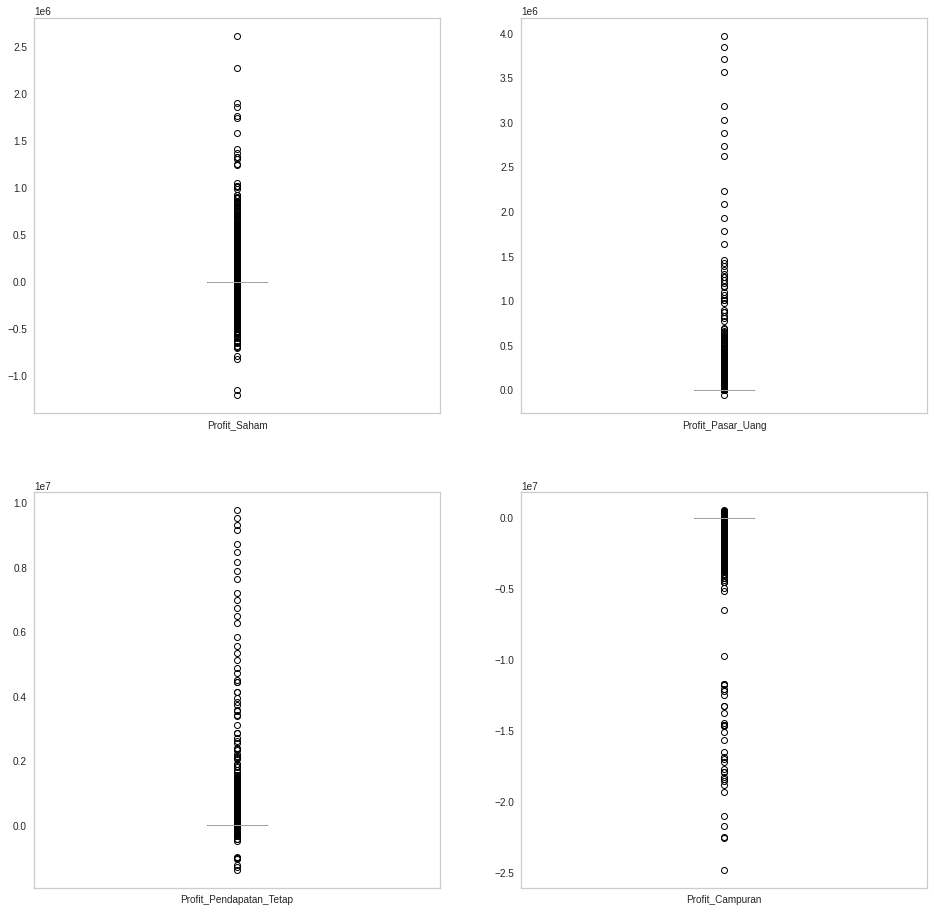

In [ ]:
#creating boxplot to spot outliers for Profit_Saham column, Profit_Pasar_Uang column, Profit_Pendapatan_Tetap column and Profit_Campuran column
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
df_nonull.boxplot(column='Profit_Saham', fontsize=10, rot=0, grid=False, figsize=(16, 8))
plt.subplot(2,2,2)
df_nonull.boxplot(column='Profit_Pasar_Uang', fontsize=10, rot=0, grid=False, figsize=(16, 8))
plt.subplot(2,2,3)
df_nonull.boxplot(column='Profit_Pendapatan_Tetap', fontsize=10, rot=0, grid=False, figsize=(16, 8))
plt.subplot(2,2,4)
df_nonull.boxplot(column='Profit_Campuran', fontsize=10, rot=0, grid=False, figsize=(16, 8))

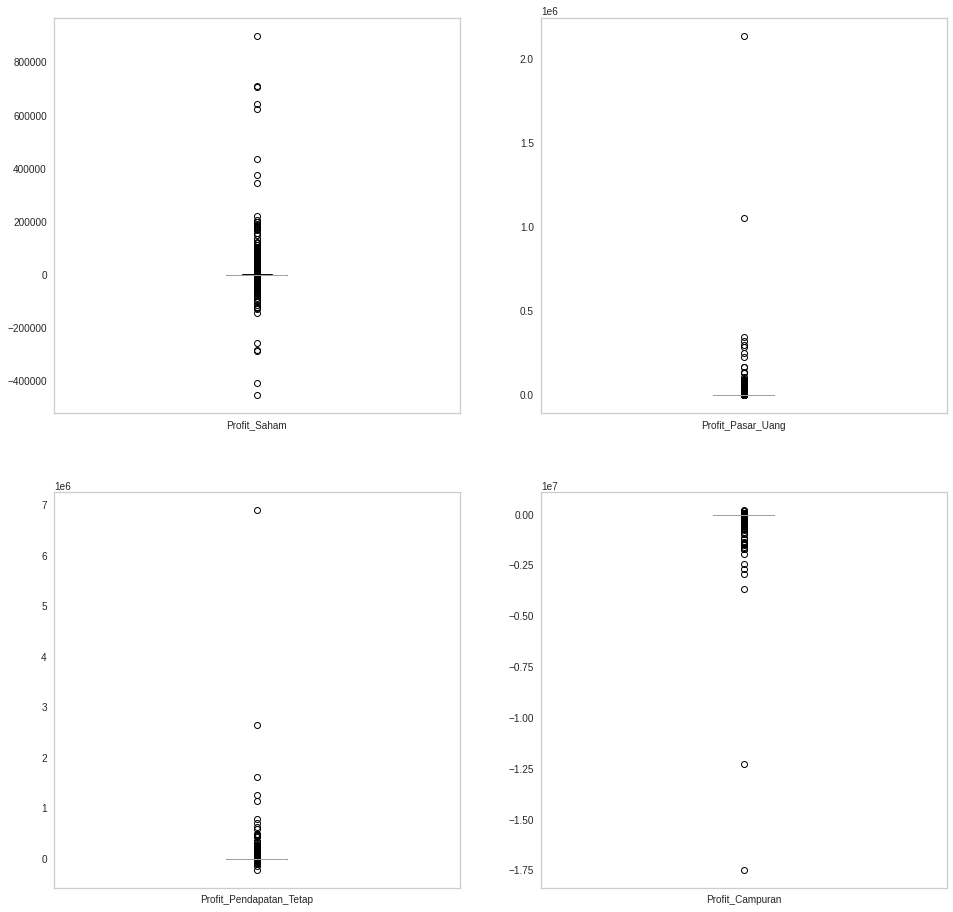

In [ ]:
#creating boxplot to spot outliers for Profit_Saham column, Profit_Pasar_Uang column, Profit_Pendapatan_Tetap column and Profit_Campuran column
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
df_nonull1.boxplot(column='Profit_Saham', fontsize=10, rot=0, grid=False, figsize=(16, 8))
plt.subplot(2,2,2)
df_nonull1.boxplot(column='Profit_Pasar_Uang', fontsize=10, rot=0, grid=False, figsize=(16, 8))
plt.subplot(2,2,3)
df_nonull1.boxplot(column='Profit_Pendapatan_Tetap', fontsize=10, rot=0, grid=False, figsize=(16, 8))
plt.subplot(2,2,4)
df_nonull1.boxplot(column='Profit_Campuran', fontsize=10, rot=0, grid=False, figsize=(16, 8))

**IQR** Profit_Saham

In [ ]:
# Hitung kuartil 1 dan 3
Q1a = df_nonull['Profit_Saham'].quantile(0.25)
Q3a = df_nonull['Profit_Saham'].quantile(0.75)

#Hitung interkuartil range
IQR1 = Q3a - Q1a
boxplot_min1 = Q1a - 1.5 * IQR1
boxplot_max1 = Q3a + 1.5 * IQR1
print('Q1a:\n',Q1a)
print('\nQ3a:\n',Q3a)
print('\nIQR1:\n',IQR1)
print('\nMin1:\n',boxplot_min1)
print('\nMax1:\n',boxplot_max1)

Q1a:
 0.0

Q3a:
 478.0

IQR1:
 478.0

Min1:
 -717.0

Max1:
 1195.0


In [ ]:
# Hitung kuartil 1 dan 3
Q1aa = df_nonull1['Profit_Saham'].quantile(0.25)
Q3aa = df_nonull1['Profit_Saham'].quantile(0.75)

#Hitung interkuartil range
IQR1m = Q3aa - Q1aa
boxplot_min1a = Q1aa - 1.5 * IQR1m
boxplot_max1a = Q3aa + 1.5 * IQR1m
print('Q1a:\n',Q1aa)
print('\nQ3a:\n',Q3aa)
print('\nIQR1:\n',IQR1m)
print('\nMin1a:\n',boxplot_min1a)
print('\nMax1a:\n',boxplot_max1a)

Q1a:
 0.0

Q3a:
 590.5482954545455

IQR1:
 590.5482954545455

Min1a:
 -885.8224431818182

Max1a:
 1476.3707386363637


**IQR** Profit_Pasar_Uang

In [ ]:
# Hitung kuartil 1 dan 3
Q1b = df_nonull['Profit_Pasar_Uang'].quantile(0.25)
Q3b = df_nonull['Profit_Pasar_Uang'].quantile(0.75)

#Hitung interkuartil range
IQR2 = Q3b - Q1b
boxplot_min2 = Q1b - 1.5 * IQR2
boxplot_max2 = Q3b + 1.5 * IQR2
print('Q1b:\n',Q1b)
print('\nQ3b:\n',Q3b)
print('\nIQR2:\n',IQR2)
print('\nMin2:\n',boxplot_min2)
print('\nMax2:\n',boxplot_max2)

Q1b:
 0.0

Q3b:
 114.0

IQR2:
 114.0

Min2:
 -171.0

Max2:
 285.0


In [ ]:
# Hitung kuartil 1 dan 3
Q1ba = df_nonull1['Profit_Pasar_Uang'].quantile(0.25)
Q3ba = df_nonull1['Profit_Pasar_Uang'].quantile(0.75)

#Hitung interkuartil range
IQR2m = Q3ba - Q1ba
boxplot_min2a = Q1ba - 1.5 * IQR2m
boxplot_max2a = Q3ba + 1.5 * IQR2m
print('Q1b:\n',Q1ba)
print('\nQ3b:\n',Q3ba)
print('\nIQR2m:\n',IQR2)
print('\nMin2a:\n',boxplot_min2a)
print('\nMax2a:\n',boxplot_max2a)

Q1b:
 0.0

Q3b:
 90.175

IQR2m:
 114.0

Min2a:
 -135.2625

Max2a:
 225.4375


**IQR** Profit_Pendapatan_Tetap

In [ ]:
# Hitung kuartil 1 dan 3
Q1c = df_nonull['Profit_Pendapatan_Tetap'].quantile(0.25)
Q3c = df_nonull['Profit_Pendapatan_Tetap'].quantile(0.75)

#Hitung interkuartil range
IQR3 = Q3c - Q1c
boxplot_min3 = Q1c - 1.5 * IQR3
boxplot_max3 = Q3c + 1.5 * IQR3
print('Q1c:\n',Q1c)
print('\nQ3c:\n',Q3c)
print('\nIQR3:\n',IQR3)
print('\nMin3:\n',boxplot_min3)
print('\nMax3:\n',boxplot_max3)

Q1c:
 0.0

Q3c:
 160.0

IQR3:
 160.0

Min3:
 -240.0

Max3:
 400.0


In [ ]:
# Hitung kuartil 1 dan 3
Q1ca = df_nonull1['Profit_Pendapatan_Tetap'].quantile(0.25)
Q3ca = df_nonull1['Profit_Pendapatan_Tetap'].quantile(0.75)

#Hitung interkuartil range
IQR3m = Q3ca - Q1ca
boxplot_min3a = Q1c - 1.5 * IQR3m
boxplot_max3a = Q3c + 1.5 * IQR3m
print('Q1ca:\n',Q1ca)
print('\nQ3ca:\n',Q3ca)
print('\nIQR3m:\n',IQR3)
print('\nMin3a:\n',boxplot_min3a)
print('\nMax3a:\n',boxplot_max3a)

Q1ca:
 0.0

Q3ca:
 91.36666666666666

IQR3m:
 160.0

Min3a:
 -137.04999999999998

Max3a:
 297.04999999999995


**IQR** Profit_Campuran

In [ ]:
# Hitung kuartil 1 dan 3
Q1d = df_nonull['Profit_Campuran'].quantile(0.25)
Q3d = df_nonull['Profit_Campuran'].quantile(0.75)

#Hitung interkuartil range
IQR4 = Q3d - Q1d
boxplot_min4 = Q1d - 1.5 * IQR4
boxplot_max4 = Q3d + 1.5 * IQR4
print('Q1d:\n',Q1d)
print('\nQ3d:\n',Q3d)
print('\nIQR4:\n',IQR4)
print('\nMin4:\n',boxplot_min4)
print('\nMax4:\n',boxplot_max4)

Q1d:
 0.0

Q3d:
 0.0

IQR4:
 0.0

Min4:
 0.0

Max4:
 0.0


In [ ]:
# Hitung kuartil 1 dan 3
Q1da = df_nonull1['Profit_Campuran'].quantile(0.25)
Q3da = df_nonull1['Profit_Campuran'].quantile(0.75)

#Hitung interkuartil range
IQR4m = Q3da - Q1da
boxplot_min4a = Q1da - 1.5 * IQR4m
boxplot_max4a = Q3da + 1.5 * IQR4m
print('Q1d:\n',Q1d)
print('\nQ3da:\n',Q3d)
print('\nIQR4m:\n',IQR4m)
print('\nMin4a:\n',boxplot_min4a)
print('\nMax4a:\n',boxplot_max4a)

Q1d:
 0.0

Q3da:
 0.0

IQR4m:
 0.0

Min4a:
 0.0

Max4a:
 0.0


After we see the Boxplot and IQR, we decided to **do not remove those outliers**. Because we think there are too many outliers in this data for us to remove.

Add a **dataframe** that has been **filtered per day** to help us analyze the dataset

In [ ]:
#Filtering this dataset per August
df_aug = df_nonull[(df_nonull['date'] > '2021-9-01')]
df_aug.reset_index(drop=True, inplace=True)

#Filtering this dataset per September
df_sep= df_nonull[(df_nonull['date'] > '2021-9-01')]
df_sep.reset_index(drop=True, inplace=True)

Add a **dataframe** that has been **filtered per month** to help us analyze the dataset

In [ ]:
#Filtering this dataset per August
df_aug1 = df_nonull1[(df_nonull1['Month'] == 'August')]
df_aug1.reset_index(drop=True, inplace=True)

#Filtering this dataset per September
df_sep1= df_nonull1[(df_nonull1['Month'] == 'September')]
df_sep1.reset_index(drop=True, inplace=True)

##Exploratory Data Analysis

"Exploratory data analysis (EDA) is an approach of analyzing data sets to **summarize** their main **characteristics**, often using **statistics** and **visualization** methods.(Wikipedia)"

EDA for this assignment consists of:


1.   Evaluate Descriptive Statistic   
2.   Visualize order dataset and check if there is some pattern on the time-series data 



###Descriptive Statistic

Descriptive statistic is an EDA method for **univariate analysis** on **numerical data**.

In [ ]:
df_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 49 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  int64         
 1   registration_import_datetime         158811 non-null  datetime64[ns]
 2   user_gender                          158811 non-null  object        
 3   user_age                             158811 non-null  int64         
 4   user_occupation                      158811 non-null  object        
 5   user_income_range                    158811 non-null  object        
 6   user_income_source                   158811 non-null  object        
 7   Month                                158811 non-null  object        
 8   date                                 158811 non-null  datetime64[ns]
 9   Saham_AUM                            158811 non-null  float64       
 

In [ ]:
df_nonull1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11352 entries, 0 to 11351
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   user_id                             11352 non-null  int64         
 1   registration_import_datetime        11352 non-null  datetime64[ns]
 2   user_gender                         11352 non-null  object        
 3   user_age                            11352 non-null  int64         
 4   user_occupation                     11352 non-null  object        
 5   user_income_range                   11352 non-null  object        
 6   user_income_source                  11352 non-null  object        
 7   Month                               11352 non-null  object        
 8   Saham_AUM                           11352 non-null  float64       
 9   Saham_invested_amount               11352 non-null  float64       
 10  Saham_Net_Transaction 

In [ ]:
df_nonull.describe()

,user_id,user_age,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Total_Buy_Saham,Total_Sell_Saham,Total_Net_Saham,Profit_Saham,Profit_Percentage_Saham,...,Campuran_transaction_amount,Total_Buy_Campuran,Total_Sell_Campuran,Total_Net_Campuran,Profit_Campuran,Profit_Percentage_Campuran,Total_Transaction,Total_Invested_Amount,Total_Profit,Total_Buy_Sell
count,1.588110e+05,158811.000000,1.588110e+05,1.588110e+05,1.588110e+05,158811.000000,158811.000000,158811.000000,1.588110e+05,1.588110e+05,...,1.588110e+05,158811.000000,158811.000000,158811.000000,1.588110e+05,158811.000000,1.588110e+05,1.588110e+05,1.588110e+05,158811.000000
mean,3.586427e+06,27.201774,2.974978e+05,2.960576e+05,7.110494e+03,0.021856,0.011385,0.033241,1.440224e+03,inf,...,2.227484e+03,0.000825,0.000290,0.001115,-9.991525e+03,-0.070745,2.444611e+03,1.853954e+05,-2.783781e+02,0.110565
std,7.782985e+05,8.579667,1.770372e+06,1.759649e+06,2.710200e+05,0.146214,0.106090,0.179265,3.024093e+04,NaN,...,2.892536e+05,0.028709,0.017017,0.033366,2.649778e+05,0.630943,2.753221e+05,7.218508e+06,3.926306e+04,0.464722
min,5.070100e+04,17.000000,0.000000e+00,0.000000e+00,-1.176680e+07,0.000000,0.000000,0.000000,-1.206213e+06,-6.640833e+00,...,-5.000000e+07,0.000000,0.000000,0.000000,-2.478103e+07,-10.831600,-3.000000e+07,0.000000e+00,-3.280608e+06,0.000000
25%,3.747364e+06,21.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,3.823361e+06,25.000000,1.008300e+04,1.000000e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
75%,3.926861e+06,31.000000,1.005060e+05,1.000000e+05,0.000000e+00,0.000000,0.000000,0.000000,4.780000e+02,7.445139e-01,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
max,4.165830e+06,83.000000,6.445433e+07,6.184000e+07,5.000000e+07,1.000000,1.000000,1.000000,2.614332e+06,inf,...,5.000000e+07,1.000000,1.000000,1.000000,5.063350e+05,4.206700,5.000000e+07,4.780760e+08,2.563392e+06,4.000000


In [ ]:
df_nonull1.describe()

,user_id,user_age,Saham_AUM,Saham_invested_amount,Saham_Net_Transaction,Total_Buy_Saham,Total_Sell_Saham,Total_Net_Saham,Profit_Saham,Profit_Percentage_Saham,...,Campuran_Net_Transaction,Total_Buy_Campuran,Total_Sell_Campuran,Total_Net_Campuran,Profit_Campuran,Profit_Percentage_Campuran,Total_Transaction,Total_Invested_Amount,Total_Profit,Total_Buy_Sell
count,1.135200e+04,11352.000000,1.135200e+04,1.135200e+04,1.135200e+04,11352.000000,11352.000000,11352.000000,11352.000000,11352.000000,...,1.135200e+04,11352.000000,11352.000000,11352.000000,1.135200e+04,11352.000000,1.135200e+04,1.135200e+04,1.135200e+04,11352.000000
mean,3.629022e+06,27.202607,4.161903e+06,4.141755e+06,9.947363e+04,0.305761,0.159267,0.465028,1416.424892,0.414853,...,3.116182e+04,0.011540,0.004052,0.015592,-7.394696e+03,-0.054932,3.419936e+04,2.593625e+06,-3.894425e+03,1.546776
std,7.791038e+05,8.579837,2.734875e+07,2.716643e+07,1.181431e+06,0.825850,0.412351,0.977868,20887.830692,1.287071,...,1.164464e+06,0.159145,0.068854,0.183986,2.160003e+05,0.529320,1.378618e+06,1.183791e+08,5.630844e+05,2.615951
min,5.070100e+04,17.000000,0.000000e+00,0.000000e+00,-1.000000e+07,0.000000,0.000000,0.000000,-454103.136364,-5.171136,...,-5.000000e+07,0.000000,0.000000,0.000000,-1.748410e+07,-8.874309,-2.770000e+07,0.000000e+00,-2.974077e+07,0.000000
25%,3.757310e+06,21.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,3.854888e+06,25.000000,1.623510e+05,1.600000e+05,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
75%,3.979977e+06,31.000000,1.217416e+06,1.200000e+06,0.000000e+00,0.000000,0.000000,1.000000,590.548295,0.948000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000
max,4.165830e+06,83.000000,1.171047e+09,1.155400e+09,5.020000e+07,17.000000,5.000000,17.000000,898754.000000,69.724249,...,5.000000e+07,7.000000,2.000000,7.000000,2.008272e+05,2.820800,1.150250e+08,1.051767e+10,4.173070e+07,47.000000


####EDA 1: Total User

**Total User** in this dataset.

In [ ]:
n = df_nonull1.user_id.nunique()
  
print("No of unique user in user_id column :",
      n)

No of unique user in user_id column : 8277


No of unique user in user_id column : **8277**

**Total User per Gender** in this dataset.

In [ ]:
#Backup dataframe
gender = df_nonull.copy()

#Show data unique user based on gender
gender = gender.groupby('user_gender')['user_id'].nunique().reset_index()

#Add new column to know the percentage between Male users and Female users
gender['Gender_Percentage'] = ((gender['user_id']/(gender['user_id'].sum()))*100).round(2)
gender

,user_gender,user_id,Gender_Percentage
0,Female,3101,37.47
1,Male,5176,62.53


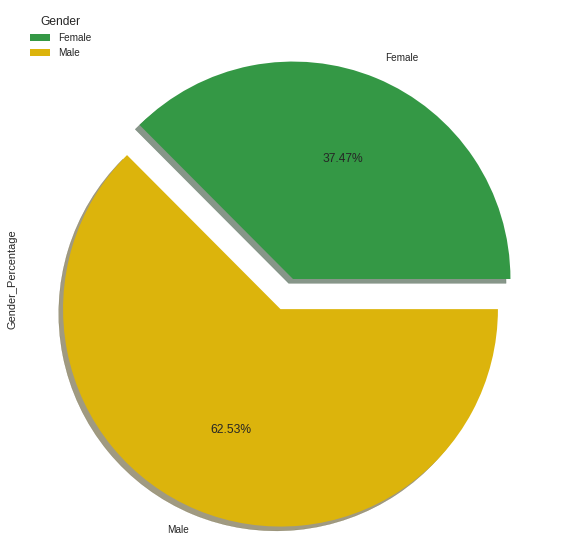

In [ ]:
#Graph Attributes
myexplode = [0,0.15]
mycolors = ['#349845', '#DCB40C']
mylabels = ['Female', 'Male']

# Show pie plot of Total User gender percentage
gender.plot.pie( y='Gender_Percentage', autopct='%.2f%%', figsize=(10,10), labels = mylabels, explode = myexplode, colors = mycolors, shadow = True, rot=0)

# showing legend
plt.legend(title = 'Gender')

####EDA 2: Average AUM

**Average AUM** per user each type of **mutual fund** in this dataset.

In [ ]:
df_avg_AUM = df_nonull.groupby(['user_id'], as_index=False).agg({'Saham_AUM': 'mean', 'Pasar_Uang_AUM': 'mean', 'Pendapatan_Tetap_AUM': 'mean', 'Campuran_AUM': 'mean'}) 
df_avg_AUM

,user_id,Saham_AUM,Pasar_Uang_AUM,Pendapatan_Tetap_AUM,Campuran_AUM
0,50701,0.000000e+00,0.000000e+00,0.000000,9960726.875
1,50961,1.698977e+06,1.263463e+05,252246.260870,0.000
2,53759,7.065243e+04,1.001464e+04,20065.321429,0.000
3,54759,0.000000e+00,1.010642e+07,0.000000,0.000
4,61414,5.447027e+02,0.000000e+00,0.000000,0.000
...,...,...,...,...,...
8272,4165020,0.000000e+00,0.000000e+00,0.000000,0.000
8273,4165132,0.000000e+00,1.000100e+04,0.000000,0.000
8274,4165630,4.162500e+04,1.000100e+04,49869.000000,0.000
8275,4165704,0.000000e+00,0.000000e+00,9987.000000,0.000


In [ ]:
# # # Make plot
# sb.barplot(x="Saham_AUM", "Pasar_Uang_AUM", "Pendapatan_Tetap_AUM", "Campuran_AUM", data = df_avg_AUM)

####EDA 3: Average Current Profit

**Average Current Profit** for each user.

In [ ]:
df_avg_profit = df_nonull1[["user_id","Profit_Saham",'Profit_Percentage_Saham','Profit_Pasar_Uang','Profit_Percentage_Pasar_Uang',
                           'Profit_Pendapatan_Tetap','Profit_Percentage_Pendapatan_Tetap','Profit_Campuran','Profit_Percentage_Campuran']]
df_avg_profit

,user_id,Profit_Saham,Profit_Percentage_Saham,Profit_Pasar_Uang,Profit_Percentage_Pasar_Uang,Profit_Pendapatan_Tetap,Profit_Percentage_Pendapatan_Tetap,Profit_Campuran,Profit_Percentage_Campuran
0,50701,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,169611.000000,1.696110
1,50701,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-58262.590909,-0.582626
2,50961,16057.000000,2.293857,49.000000,0.049000,117.000000,0.058500,0.000000,0.000000
3,50961,30018.909091,1.740186,268.954545,0.245461,70.318182,0.054679,0.000000,0.000000
4,53759,140.000000,0.200000,3.833333,0.038333,53.666667,0.268333,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
11347,4165020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11348,4165132,0.000000,0.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000
11349,4165630,1625.000000,4.062500,1.000000,0.010000,-131.000000,-0.262000,0.000000,0.000000
11350,4165704,0.000000,0.000000,0.000000,0.000000,-13.000000,-0.130000,0.000000,0.000000


**Top 5** biggest profit per user.

In [ ]:
df_avg_total_profit = df_nonull1[['user_id', 'Total_Profit']]
df_avg_total_profit.sort_values(by=['Total_Profit'], ascending=False, inplace=True)
df_avg_total_profit.reset_index(drop=True, inplace=True)
df_avg_total_profit_top5 = df_avg_total_profit.head(6)
df_avg_total_profit_top5

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,user_id,Total_Profit
0,3744696,41730703.0
1,3744696,7785161.0
2,3834936,5076185.0
3,3966791,3040472.0
4,3962475,1352444.0
5,3938287,1302260.0


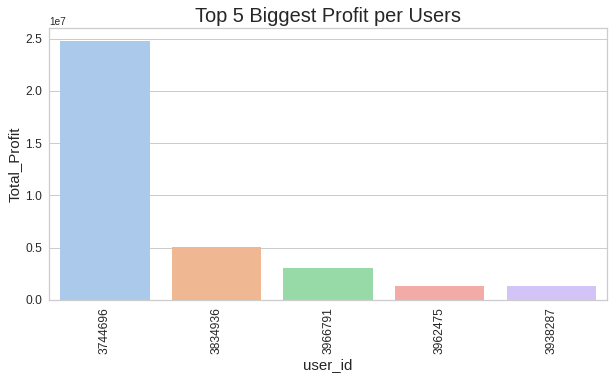

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Top 5 Biggest Profit per Users',fontsize=20)
plt.xlabel('User ID', fontsize=15)
plt.ylabel('Total Profit', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

sns.barplot(x='user_id', y='Total_Profit', orient='v', ci=None, data=df_avg_total_profit_top5, palette='pastel',
            order=df_avg_total_profit_top5.groupby('user_id')['Total_Profit'].max().sort_values(ascending=False).index[:5])

####EDA 4: Total Transaction

**Total Transaction** each type of **mutual funds** in this dataset.

In [ ]:
df_nonull['Saham_Transaction_Type'].value_counts()

No Transaction      153532
Buy Transaction       3471
Sell Transaction      1808
Name: Saham_Transaction_Type, dtype: int64

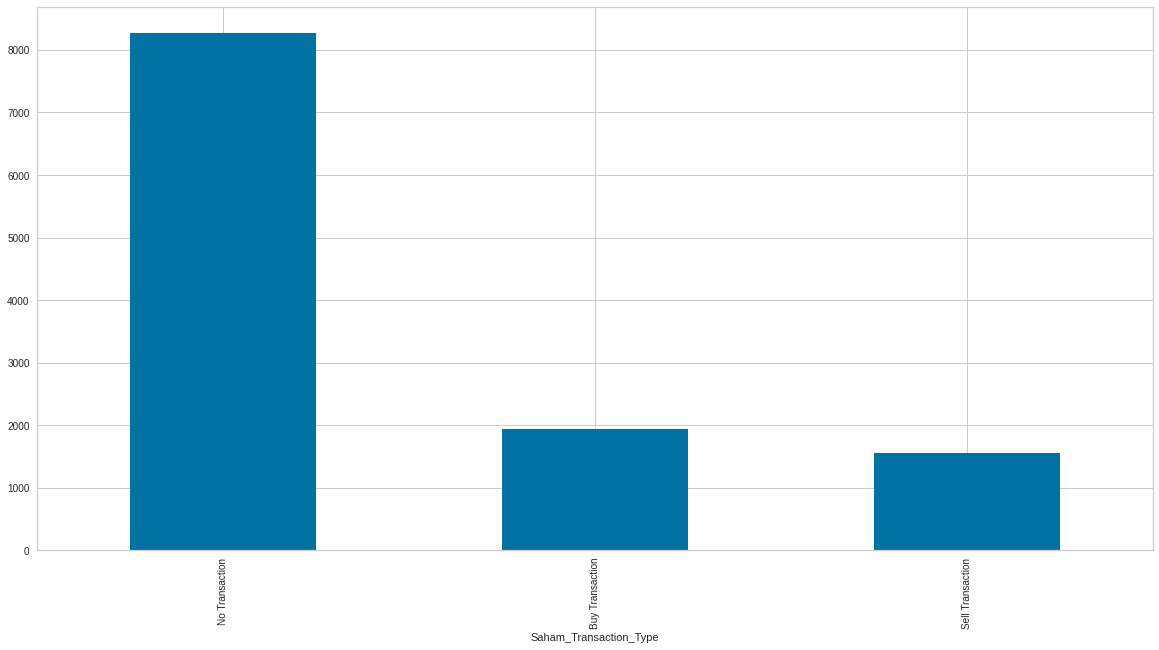

In [ ]:
df_saham_type=df_nonull.groupby('Saham_Transaction_Type')['user_id'].nunique().sort_values(ascending=False)
df_saham_type.plot.bar(figsize=(20,10))

In [ ]:
df_nonull['Pasar_Uang_Transaction_Type'].value_counts()

No Transaction      152375
Buy Transaction       4426
Sell Transaction      2010
Name: Pasar_Uang_Transaction_Type, dtype: int64

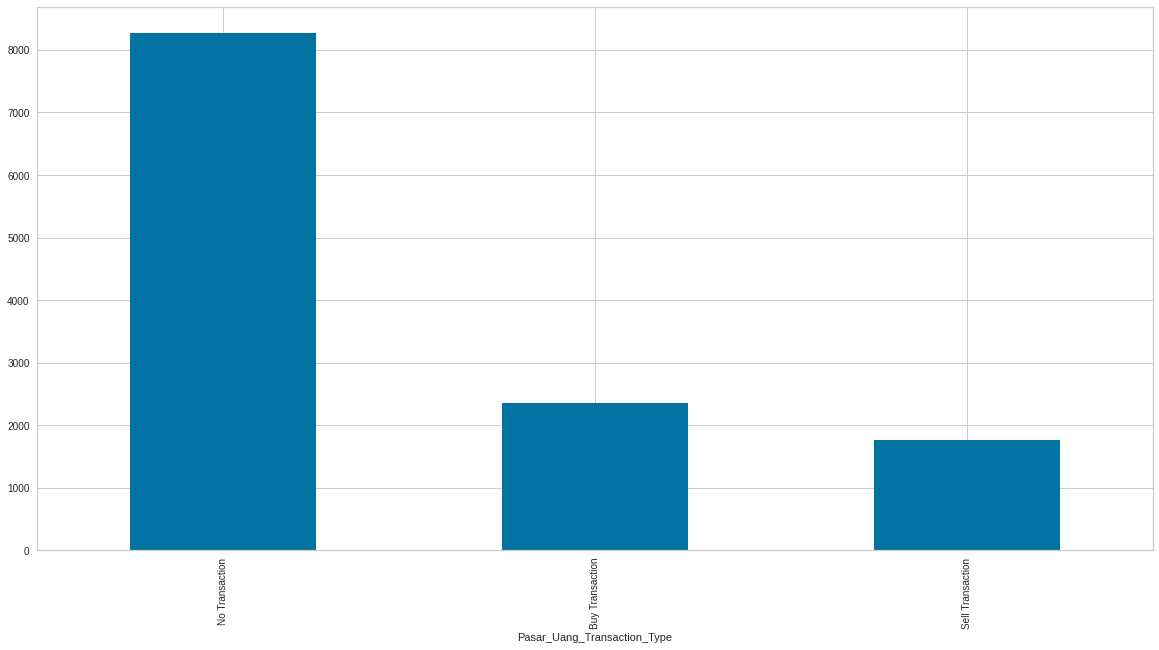

In [ ]:
df_pu_type=df_nonull.groupby('Pasar_Uang_Transaction_Type')['user_id'].nunique().sort_values(ascending=False)
df_pu_type.plot.bar(figsize=(20,10))

In [ ]:
df_nonull['Pendapatan_Tetap_Transaction_Type'].value_counts()

No Transaction      153144
Buy Transaction       4086
Sell Transaction      1581
Name: Pendapatan_Tetap_Transaction_Type, dtype: int64

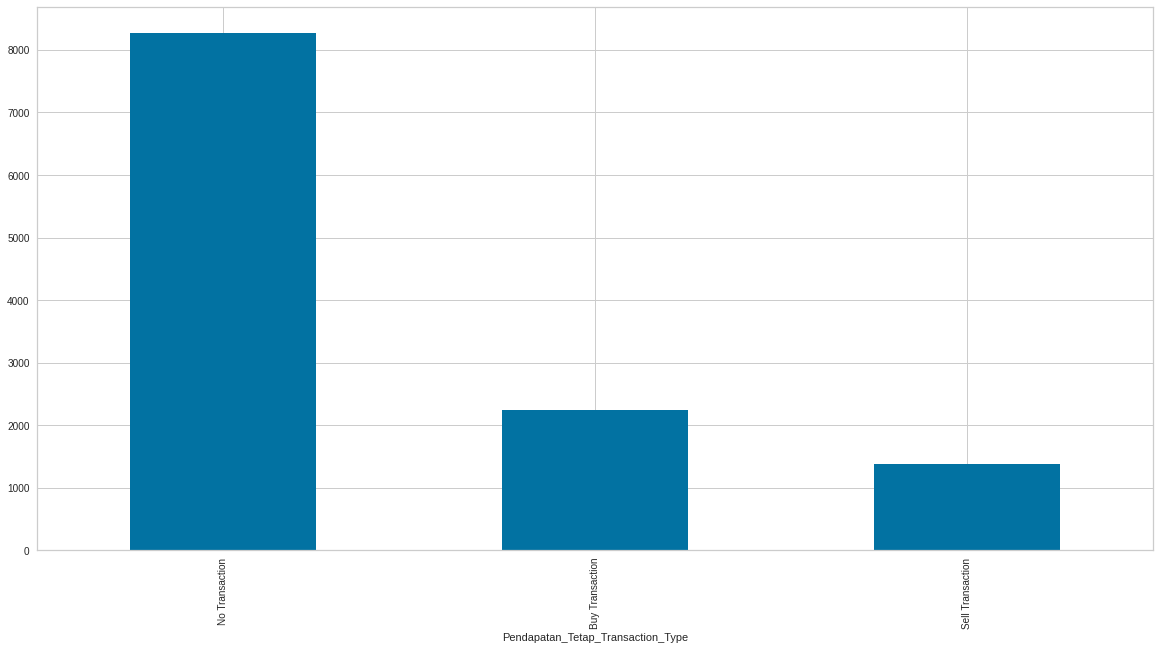

In [ ]:
df_pt_type=df_nonull.groupby('Pendapatan_Tetap_Transaction_Type')['user_id'].nunique().sort_values(ascending=False)
df_pt_type.plot.bar(figsize=(20,10))

In [ ]:
df_nonull['Campuran_Transaction_Type'].value_counts()

No Transaction      158634
Buy Transaction        131
Sell Transaction        46
Name: Campuran_Transaction_Type, dtype: int64

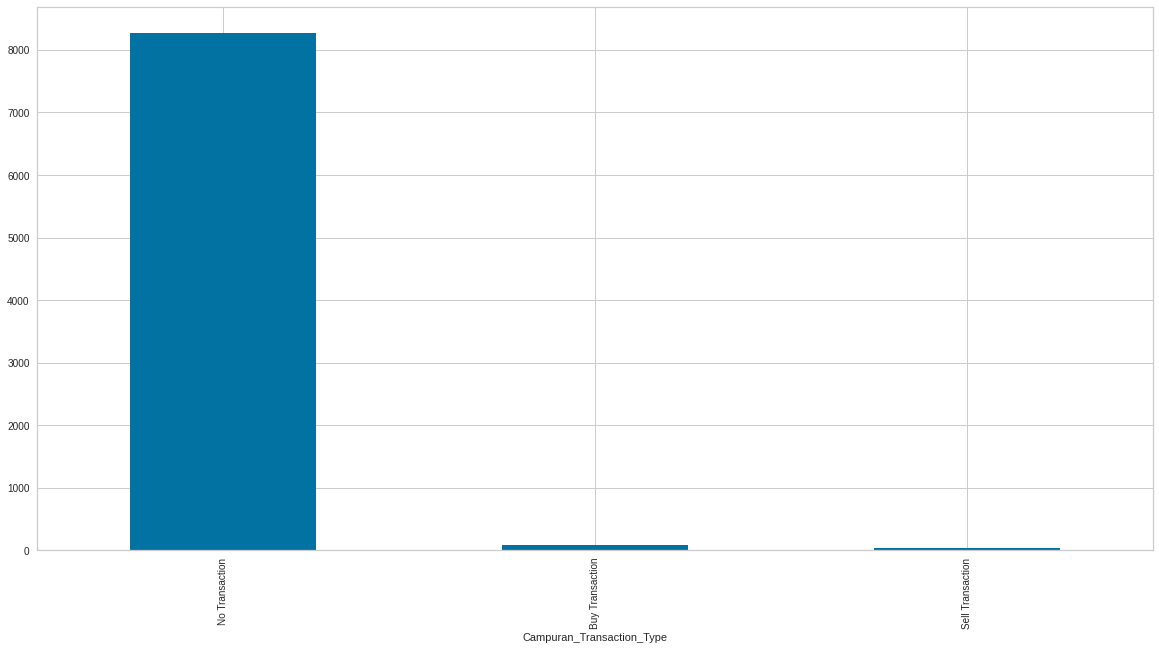

In [ ]:
df_c_type=df_nonull.groupby('Campuran_Transaction_Type')['user_id'].nunique().sort_values(ascending=False)
df_c_type.plot.bar(figsize=(20,10))

####EDA 5: Total Net Transaction

**Total Net Transaction** each user in this dataset.

In [ ]:
df_total_transaction = df_nonull1[["user_id","Saham_Net_Transaction",'Pasar_Uang_Net_Transaction','Pendapatan_Tetap_Net_Transaction','Campuran_Net_Transaction']]
df_total_transaction

,user_id,Saham_Net_Transaction,Pasar_Uang_Net_Transaction,Pendapatan_Tetap_Net_Transaction,Campuran_Net_Transaction
0,50701,0.0,0.0,0.0,0.0
1,50701,0.0,0.0,0.0,0.0
2,50961,0.0,0.0,0.0,0.0
3,50961,1300000.0,600000.0,1200000.0,0.0
4,53759,0.0,0.0,0.0,0.0
...,...,...,...,...,...
11347,4165020,0.0,0.0,0.0,0.0
11348,4165132,0.0,0.0,0.0,0.0
11349,4165630,0.0,0.0,0.0,0.0
11350,4165704,0.0,0.0,0.0,0.0


#### EDA 6: Classification User Transaction per Month

,Month,user_id
0,August,3075
1,September,8277


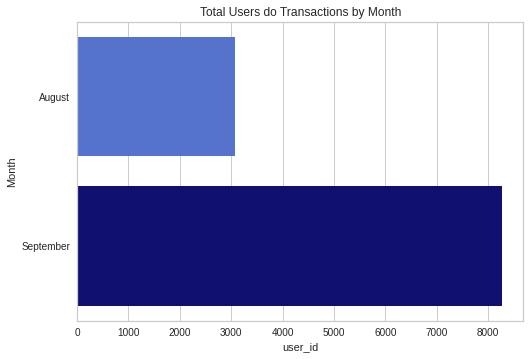

In [ ]:
user_day = df_nonull[['user_id']].groupby(df_nonull['Month'])
transaction_user_day = user_day.nunique().reset_index()
transaction_user_day

color6 = ['royalblue', 'navy']

display(transaction_user_day)
plt.title('Total Users do Transactions by Month')
sns.barplot(x='user_id', y='Month', orient='h', data=transaction_user_day, palette = color6)

####EDA 7 : Behaviour Pattern per User Occupation

In [ ]:
df_eda7=df_sep.groupby(['date','user_occupation']).count()['user_id']
df_eda7

date        user_occupation
2021-09-02  Guru                 23
            IRT                 168
            Lainnya             322
            PNS                  65
            Pelajar            2067
                               ... 
2021-09-30  Pelajar            4473
            Pengusaha           324
            Pensiunan             4
            Swasta             1868
            TNI/Polisi           26
Name: user_id, Length: 189, dtype: int64

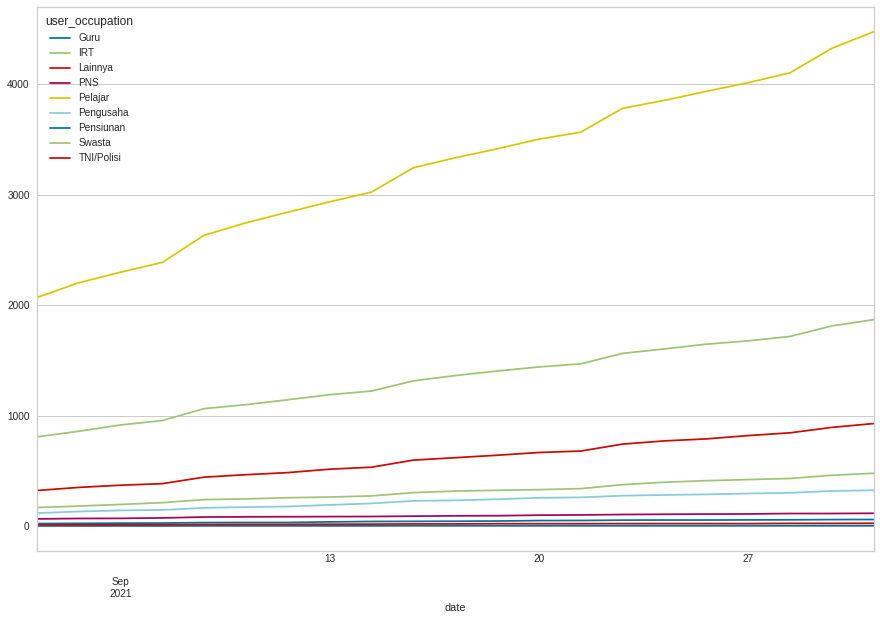

In [ ]:
df_eda7.unstack().plot(figsize=(15,10))
plt.xticks(rotation=45)
plt.show()

###Identify Key Trends In Dataset

In [ ]:
grouped1 = df_sep['Saham_transaction_amount'].groupby(df_sep['date']).sum()
grouped1a = grouped1.reset_index()
display(grouped1)
grouped1a

date
2021-09-02     20765206.0
2021-09-03     39238618.0
2021-09-06      2149362.0
2021-09-07     32893116.0
2021-09-08     50820437.0
2021-09-09     58300365.0
2021-09-10     37250638.0
2021-09-13     25336121.0
2021-09-14     13322493.0
2021-09-15     72620929.0
2021-09-16     39898371.0
2021-09-17     59208418.0
2021-09-20     67722874.0
2021-09-21     43966293.0
2021-09-22    121715277.0
2021-09-23     27159316.0
2021-09-24     26345903.0
2021-09-27     -3096235.0
2021-09-28     19011091.0
2021-09-29     66332385.0
2021-09-30     86057590.0
Name: Saham_transaction_amount, dtype: float64

,date,Saham_transaction_amount
0,2021-09-02,20765206.0
1,2021-09-03,39238618.0
2,2021-09-06,2149362.0
3,2021-09-07,32893116.0
4,2021-09-08,50820437.0
5,2021-09-09,58300365.0
6,2021-09-10,37250638.0
7,2021-09-13,25336121.0
8,2021-09-14,13322493.0
9,2021-09-15,72620929.0


In [ ]:
grouped1b = grouped1a.copy()
grouped1b['day_Sept_2021'] = grouped1b.date.dt.day
grouped1b

,date,Saham_transaction_amount,day_Sept_2021
0,2021-09-02,20765206.0,2
1,2021-09-03,39238618.0,3
2,2021-09-06,2149362.0,6
3,2021-09-07,32893116.0,7
4,2021-09-08,50820437.0,8
5,2021-09-09,58300365.0,9
6,2021-09-10,37250638.0,10
7,2021-09-13,25336121.0,13
8,2021-09-14,13322493.0,14
9,2021-09-15,72620929.0,15


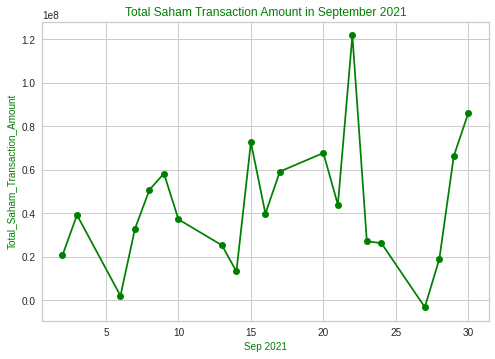

In [ ]:
plt.plot(grouped1b['day_Sept_2021'], grouped1b['Saham_transaction_amount'], color='green', marker='o')
plt.title('Total Saham Transaction Amount in September 2021', fontsize=12, color='green')
plt.xlabel('Sep 2021', fontsize=10, color='green')
plt.ylabel('Total_Saham_Transaction_Amount', fontsize=10, color='green')
plt.grid(True)
plt.show()

In [ ]:
grouped2 = df_sep['Pasar_Uang_transaction_amount'].groupby(df_sep['date']).sum()
grouped2a = grouped2.reset_index()
display(grouped2)
grouped2a

date
2021-09-02     32308137.0
2021-09-03    314051582.0
2021-09-06    174384510.0
2021-09-07    202120971.0
2021-09-08     42728971.0
2021-09-09    -40854538.0
2021-09-10     33935909.0
2021-09-13     30573032.0
2021-09-14     68833183.0
2021-09-15     17302277.0
2021-09-16     41699195.0
2021-09-17    152772507.0
2021-09-20     46749001.0
2021-09-21     39967167.0
2021-09-22     52844738.0
2021-09-23     34886595.0
2021-09-24     72846290.0
2021-09-27     67050922.0
2021-09-28     91964498.0
2021-09-29      6677780.0
2021-09-30    440563704.0
Name: Pasar_Uang_transaction_amount, dtype: float64

,date,Pasar_Uang_transaction_amount
0,2021-09-02,32308137.0
1,2021-09-03,314051582.0
2,2021-09-06,174384510.0
3,2021-09-07,202120971.0
4,2021-09-08,42728971.0
5,2021-09-09,-40854538.0
6,2021-09-10,33935909.0
7,2021-09-13,30573032.0
8,2021-09-14,68833183.0
9,2021-09-15,17302277.0


In [ ]:
grouped2b = grouped2a.copy()
grouped2b['day_Sept_2021'] = grouped2b.date.dt.day
grouped2b

,date,Pasar_Uang_transaction_amount,day_Sept_2021
0,2021-09-02,32308137.0,2
1,2021-09-03,314051582.0,3
2,2021-09-06,174384510.0,6
3,2021-09-07,202120971.0,7
4,2021-09-08,42728971.0,8
5,2021-09-09,-40854538.0,9
6,2021-09-10,33935909.0,10
7,2021-09-13,30573032.0,13
8,2021-09-14,68833183.0,14
9,2021-09-15,17302277.0,15


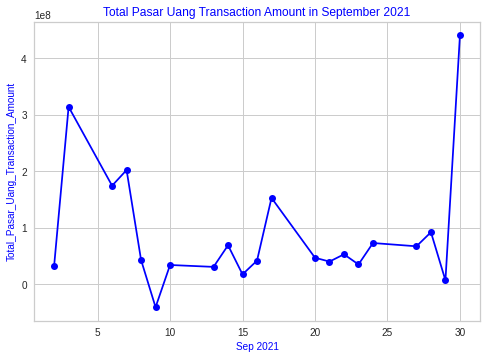

In [ ]:
plt.plot(grouped2b['day_Sept_2021'], grouped2b['Pasar_Uang_transaction_amount'], color='blue', marker='o')
plt.title('Total Pasar Uang Transaction Amount in September 2021', fontsize=12, color='blue')
plt.xlabel('Sep 2021', fontsize=10, color='blue')
plt.ylabel('Total_Pasar_Uang_Transaction_Amount', fontsize=10, color='blue')
plt.grid(True)
plt.show()

In [ ]:
grouped3 = df_sep['Pendapatan_Tetap_transaction_amount'].groupby(df_sep['date']).sum()
grouped3a = grouped3.reset_index()
display(grouped3)
grouped3a

date
2021-09-02     81989131.0
2021-09-03    245103241.0
2021-09-06    556435582.0
2021-09-07     51768392.0
2021-09-08     64629181.0
2021-09-09     52169395.0
2021-09-10    226336104.0
2021-09-13     72730635.0
2021-09-14     24724710.0
2021-09-15    260499799.0
2021-09-16    213947810.0
2021-09-17    171243642.0
2021-09-20    513287507.0
2021-09-21     82684640.0
2021-09-22    201735755.0
2021-09-23    150988117.0
2021-09-24     97469424.0
2021-09-27     40497951.0
2021-09-28    342260023.0
2021-09-29    108007676.0
2021-09-30    168658166.0
Name: Pendapatan_Tetap_transaction_amount, dtype: float64

,date,Pendapatan_Tetap_transaction_amount
0,2021-09-02,81989131.0
1,2021-09-03,245103241.0
2,2021-09-06,556435582.0
3,2021-09-07,51768392.0
4,2021-09-08,64629181.0
5,2021-09-09,52169395.0
6,2021-09-10,226336104.0
7,2021-09-13,72730635.0
8,2021-09-14,24724710.0
9,2021-09-15,260499799.0


In [ ]:
grouped3b = grouped3a.copy()
grouped3b['day_Sept_2021'] = grouped3b.date.dt.day
grouped3b

,date,Pendapatan_Tetap_transaction_amount,day_Sept_2021
0,2021-09-02,81989131.0,2
1,2021-09-03,245103241.0,3
2,2021-09-06,556435582.0,6
3,2021-09-07,51768392.0,7
4,2021-09-08,64629181.0,8
5,2021-09-09,52169395.0,9
6,2021-09-10,226336104.0,10
7,2021-09-13,72730635.0,13
8,2021-09-14,24724710.0,14
9,2021-09-15,260499799.0,15


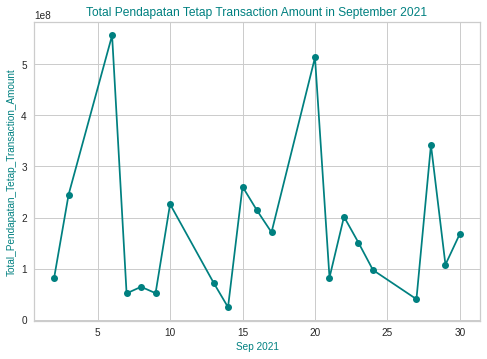

In [ ]:
plt.plot(grouped3b['day_Sept_2021'], grouped3b['Pendapatan_Tetap_transaction_amount'], color='teal', marker='o')
plt.title('Total Pendapatan Tetap Transaction Amount in September 2021', fontsize=12, color='teal')
plt.xlabel('Sep 2021', fontsize=10, color='teal')
plt.ylabel('Total_Pendapatan_Tetap_Transaction_Amount', fontsize=10, color='teal')
plt.grid(True)
plt.show()

In [ ]:
grouped4 = df_sep['Campuran_transaction_amount'].groupby(df_sep['date']).sum()
grouped4a = grouped4.reset_index()
display(grouped4)
grouped4a

date
2021-09-02     1000000.0
2021-09-03    47100000.0
2021-09-06    22874900.0
2021-09-07    20000000.0
2021-09-08    -3900000.0
2021-09-09     5000000.0
2021-09-10    58000000.0
2021-09-13    17835000.0
2021-09-14     1700000.0
2021-09-15     6701102.0
2021-09-16   -20026600.0
2021-09-17     7106743.0
2021-09-20     3057000.0
2021-09-21    13950000.0
2021-09-22    29100000.0
2021-09-23    17500000.0
2021-09-24     7050000.0
2021-09-27    -2100000.0
2021-09-28     1950000.0
2021-09-29    23000000.0
2021-09-30    13599000.0
Name: Campuran_transaction_amount, dtype: float64

,date,Campuran_transaction_amount
0,2021-09-02,1000000.0
1,2021-09-03,47100000.0
2,2021-09-06,22874900.0
3,2021-09-07,20000000.0
4,2021-09-08,-3900000.0
5,2021-09-09,5000000.0
6,2021-09-10,58000000.0
7,2021-09-13,17835000.0
8,2021-09-14,1700000.0
9,2021-09-15,6701102.0


In [ ]:
grouped4b = grouped4a.copy()
grouped4b['day_Sept_2021'] = grouped4b.date.dt.day
grouped4b

,date,Campuran_transaction_amount,day_Sept_2021
0,2021-09-02,1000000.0,2
1,2021-09-03,47100000.0,3
2,2021-09-06,22874900.0,6
3,2021-09-07,20000000.0,7
4,2021-09-08,-3900000.0,8
5,2021-09-09,5000000.0,9
6,2021-09-10,58000000.0,10
7,2021-09-13,17835000.0,13
8,2021-09-14,1700000.0,14
9,2021-09-15,6701102.0,15


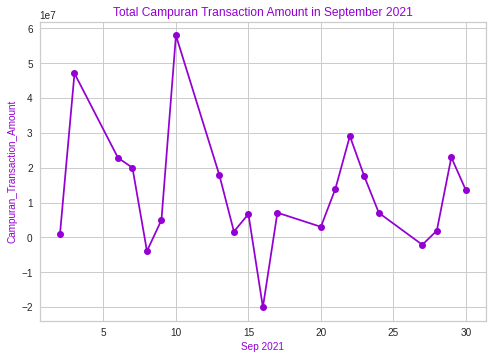

In [ ]:
plt.plot(grouped4b['day_Sept_2021'], grouped4b['Campuran_transaction_amount'], color='darkviolet', marker='o')
plt.title('Total Campuran Transaction Amount in September 2021', fontsize=12, color='darkviolet')
plt.xlabel('Sep 2021', fontsize=10, color='darkviolet')
plt.ylabel('Campuran_Transaction_Amount', fontsize=10, color='darkviolet')
plt.grid(True)
plt.show()

**Conclusion**

As we can see in the 4 graphs above, the trend tends to go up and down but there are interesting things that we can see, the average from the graph above can be seen at the beginning of the month and on 21-25 there is a **high season**, but opposite to that time, the middle of the month tends to be **low season**.

##Clustering Analysis

Prepare again the data that will be use for clustering.

We add a new column to determine the **user_age** by **age_group**

In [ ]:
df_sep1.loc[df_sep1['user_age'].between(16,26), 'age_group'] = '17-25'
df_sep1.loc[df_sep1['user_age'].between(25,36), 'age_group'] = '26-35'
df_sep1.loc[df_sep1['user_age'].between(35,46), 'age_group'] = '36-45'
df_sep1.loc[df_sep1['user_age'].between(45,56), 'age_group'] = '46-55'
df_sep1.loc[df_sep1['user_age']>56, 'age_group'] = '>56'
df_sep1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,user_income_source,Month,Saham_AUM,Saham_invested_amount,...,Total_Buy_Campuran,Total_Sell_Campuran,Total_Net_Campuran,Profit_Campuran,Profit_Percentage_Campuran,Total_Transaction,Total_Invested_Amount,Total_Profit,Total_Buy_Sell,age_group
0,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,Gaji,September,0.0,0.0,...,0,0,0,-58262.590909,-0.582626,0.0,0.0,0.0,0,26-35
1,50961,2021-08-20 16:22:29,Female,33,Swasta,> Rp 100 Juta - 500 Juta,Gaji,September,38360416.0,37700000.0,...,0,0,0,0.000000,0.000000,0.0,0.0,0.0,4,26-35
2,53759,2021-08-19 14:18:30,Male,29,Swasta,< 10 Juta,Gaji,September,1557428.0,1540000.0,...,0,0,0,0.000000,0.000000,0.0,0.0,0.0,0,26-35
3,54759,2021-08-11 21:16:05,Male,27,Swasta,> Rp 100 Juta - 500 Juta,Gaji,September,0.0,0.0,...,0,0,0,0.000000,0.000000,0.0,0.0,0.0,1,26-35
4,61414,2021-08-08 21:26:04,Male,26,Pelajar,< 10 Juta,Tabungan,September,0.0,0.0,...,0,0,0,0.000000,0.000000,0.0,0.0,0.0,0,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,4165020,2021-09-28 12:04:25,Male,24,Lainnya,< 10 Juta,Keuntungan Bisnis,September,0.0,0.0,...,0,0,0,0.000000,0.000000,0.0,0.0,0.0,0,17-25
8273,4165132,2021-09-28 12:04:22,Male,18,Pelajar,< 10 Juta,Tabungan,September,0.0,0.0,...,0,0,0,0.000000,0.000000,0.0,0.0,0.0,0,17-25
8274,4165630,2021-09-28 12:46:26,Female,28,Swasta,Rp 10 Juta - 50 Juta,Keluarga,September,41625.0,40000.0,...,0,0,0,0.000000,0.000000,0.0,0.0,0.0,0,26-35
8275,4165704,2021-09-28 12:54:00,Male,25,Swasta,Rp 10 Juta - 50 Juta,Gaji,September,0.0,0.0,...,0,0,0,0.000000,0.000000,0.0,0.0,0.0,0,26-35


###Libraries

Before we do a clustering analysis, first we need to **import the libraries** that we need to do a clustering analysis.

In [ ]:
from sklearn.cluster import KMeans                                             
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler    
from sklearn import cluster                                                    
import matplotlib.cm as cm                                                     
from sklearn.metrics import silhouette_samples, silhouette_score               
from sklearn.datasets import make_blobs                                        
from yellowbrick.cluster import SilhouetteVisualizer                             

###Data Preparation

Preparing the dataset to clustering the dataset

In [ ]:
#Prepare the dataset
data_prep = df_sep1.copy()
data_prep1 = df_nonull1.copy()

#Preview the dataset
data_prep

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,user_income_source,Month,Saham_AUM,Saham_invested_amount,...,Total_Buy_Campuran,Total_Sell_Campuran,Total_Net_Campuran,Profit_Campuran,Profit_Percentage_Campuran,Total_Transaction,Total_Invested_Amount,Total_Profit,Total_Buy_Sell,age_group
0,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,Gaji,September,0.0,0.0,...,0,0,0,-58262.590909,-0.582626,0.0,0.0,0.0,0,26-35
1,50961,2021-08-20 16:22:29,Female,33,Swasta,> Rp 100 Juta - 500 Juta,Gaji,September,38360416.0,37700000.0,...,0,0,0,0.000000,0.000000,0.0,0.0,0.0,4,26-35
2,53759,2021-08-19 14:18:30,Male,29,Swasta,< 10 Juta,Gaji,September,1557428.0,1540000.0,...,0,0,0,0.000000,0.000000,0.0,0.0,0.0,0,26-35
3,54759,2021-08-11 21:16:05,Male,27,Swasta,> Rp 100 Juta - 500 Juta,Gaji,September,0.0,0.0,...,0,0,0,0.000000,0.000000,0.0,0.0,0.0,1,26-35
4,61414,2021-08-08 21:26:04,Male,26,Pelajar,< 10 Juta,Tabungan,September,0.0,0.0,...,0,0,0,0.000000,0.000000,0.0,0.0,0.0,0,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,4165020,2021-09-28 12:04:25,Male,24,Lainnya,< 10 Juta,Keuntungan Bisnis,September,0.0,0.0,...,0,0,0,0.000000,0.000000,0.0,0.0,0.0,0,17-25
8273,4165132,2021-09-28 12:04:22,Male,18,Pelajar,< 10 Juta,Tabungan,September,0.0,0.0,...,0,0,0,0.000000,0.000000,0.0,0.0,0.0,0,17-25
8274,4165630,2021-09-28 12:46:26,Female,28,Swasta,Rp 10 Juta - 50 Juta,Keluarga,September,41625.0,40000.0,...,0,0,0,0.000000,0.000000,0.0,0.0,0.0,0,26-35
8275,4165704,2021-09-28 12:54:00,Male,25,Swasta,Rp 10 Juta - 50 Juta,Gaji,September,0.0,0.0,...,0,0,0,0.000000,0.000000,0.0,0.0,0.0,0,26-35


In [ ]:
#Preview the dataset
data_prep.keys()

Index(['user_id', 'registration_import_datetime', 'user_gender', 'user_age',
       'user_occupation', 'user_income_range', 'user_income_source', 'Month',
       'Saham_AUM', 'Saham_invested_amount', 'Saham_Net_Transaction',
       'Total_Buy_Saham', 'Total_Sell_Saham', 'Total_Net_Saham',
       'Profit_Saham', 'Profit_Percentage_Saham', 'Pasar_Uang_AUM',
       'Pasar_Uang_invested_amount', 'Pasar_Uang_Net_Transaction',
       'Total_Buy_Pasar_Uang', 'Total_Sell_Pasar_Uang', 'Total_Net_Pasar_Uang',
       'Profit_Pasar_Uang', 'Profit_Percentage_Pasar_Uang',
       'Pendapatan_Tetap_AUM', 'Pendapatan_Tetap_invested_amount',
       'Pendapatan_Tetap_Net_Transaction', 'Total_Buy_Pendapatan_Tetap',
       'Total_Sell_Pendapatan_Tetap', 'Total_Net_Pendapatan_Tetap',
       'Profit_Pendapatan_Tetap', 'Profit_Percentage_Pendapatan_Tetap',
       'Campuran_AUM', 'Campuran_invested_amount', 'Campuran_Net_Transaction',
       'Total_Buy_Campuran', 'Total_Sell_Campuran', 'Total_Net_Campuran',
  

### Features Engineering

Extracting the columns from the dataset that we need to do a **clustering**.

In [ ]:
#Extract the columns from the dataset
dfcluster1=data_prep[['user_id', 'user_age', 'user_gender','age_group','user_occupation','user_income_range',
                      'user_income_source', 'Total_Buy_Sell', 'Total_Invested_Amount','Total_Profit']]
dfcluster1

,user_id,user_age,user_gender,age_group,user_occupation,user_income_range,user_income_source,Total_Buy_Sell,Total_Invested_Amount,Total_Profit
0,50701,28,Female,26-35,IRT,Rp 10 Juta - 50 Juta,Gaji,0,0.0,0.0
1,50961,33,Female,26-35,Swasta,> Rp 100 Juta - 500 Juta,Gaji,4,0.0,0.0
2,53759,29,Male,26-35,Swasta,< 10 Juta,Gaji,0,0.0,0.0
3,54759,27,Male,26-35,Swasta,> Rp 100 Juta - 500 Juta,Gaji,1,0.0,0.0
4,61414,26,Male,26-35,Pelajar,< 10 Juta,Tabungan,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8272,4165020,24,Male,17-25,Lainnya,< 10 Juta,Keuntungan Bisnis,0,0.0,0.0
8273,4165132,18,Male,17-25,Pelajar,< 10 Juta,Tabungan,0,0.0,0.0
8274,4165630,28,Female,26-35,Swasta,Rp 10 Juta - 50 Juta,Keluarga,0,0.0,0.0
8275,4165704,25,Male,26-35,Swasta,Rp 10 Juta - 50 Juta,Gaji,0,0.0,0.0


In [ ]:
#Preview the dataset
dfcluster1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8277 entries, 0 to 8276
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8277 non-null   int64  
 1   user_age               8277 non-null   int64  
 2   user_gender            8277 non-null   object 
 3   age_group              8277 non-null   object 
 4   user_occupation        8277 non-null   object 
 5   user_income_range      8277 non-null   object 
 6   user_income_source     8277 non-null   object 
 7   Total_Buy_Sell         8277 non-null   int64  
 8   Total_Invested_Amount  8277 non-null   float64
 9   Total_Profit           8277 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 646.8+ KB


There are **5** categorical variables and **4** non categorical/numeric

###Encoding Numeric Variables

In [ ]:
check1 = dfcluster1['user_gender'].unique().tolist()
check2 = dfcluster1['age_group'].unique().tolist()
check3 = dfcluster1['user_occupation'].unique().tolist()
check4 = dfcluster1['user_income_range'].unique().tolist()
check5 = dfcluster1['user_income_source'].unique().tolist()
print(check1)
print(check2)
print(check3)
print(check4)
print(check5)

['Female', 'Male']
['26-35', '36-45', '17-25', '46-55', '>56']
['IRT', 'Swasta', 'Pelajar', 'Lainnya', 'Pengusaha', 'PNS', 'TNI/Polisi', 'Pensiunan', 'Guru']
['Rp 10 Juta - 50 Juta', '> Rp 100 Juta - 500 Juta', '< 10 Juta', '> Rp 50 Juta - 100 Juta', '> Rp 500 Juta - 1 Miliar', '> Rp 1 Miliar']
['Gaji', 'Tabungan', 'Keluarga', 'Lainnya', 'Keuntungan Bisnis']


Build a **dummies** data to convert categorical variables to be non categorical/numeric.

In [ ]:
dum_df = pd.get_dummies(dfcluster1, columns=["user_gender"], prefix=["user_gender"])
dfcluster1 = dfcluster1.merge(dum_df)
dfcluster1

,user_id,user_age,user_gender,age_group,user_occupation,user_income_range,user_income_source,Total_Buy_Sell,Total_Invested_Amount,Total_Profit,user_gender_Female,user_gender_Male
0,50701,28,Female,26-35,IRT,Rp 10 Juta - 50 Juta,Gaji,0,0.0,0.0,1,0
1,50961,33,Female,26-35,Swasta,> Rp 100 Juta - 500 Juta,Gaji,4,0.0,0.0,1,0
2,53759,29,Male,26-35,Swasta,< 10 Juta,Gaji,0,0.0,0.0,0,1
3,54759,27,Male,26-35,Swasta,> Rp 100 Juta - 500 Juta,Gaji,1,0.0,0.0,0,1
4,61414,26,Male,26-35,Pelajar,< 10 Juta,Tabungan,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8272,4165020,24,Male,17-25,Lainnya,< 10 Juta,Keuntungan Bisnis,0,0.0,0.0,0,1
8273,4165132,18,Male,17-25,Pelajar,< 10 Juta,Tabungan,0,0.0,0.0,0,1
8274,4165630,28,Female,26-35,Swasta,Rp 10 Juta - 50 Juta,Keluarga,0,0.0,0.0,1,0
8275,4165704,25,Male,26-35,Swasta,Rp 10 Juta - 50 Juta,Gaji,0,0.0,0.0,0,1


In [ ]:
#Convert the datatype
dfcluster1['age_group'] = dfcluster1['age_group'].astype('category')
dfcluster1['age_group'] = dfcluster1['age_group'].cat.set_categories(['17-25','26-35','36-45','46-55','>56'], ordered = True)
dfcluster1['Age_Category'] = dfcluster1['age_group'].cat.codes
dfcluster1['user_occupation'] = dfcluster1['user_occupation'].astype('category')
dfcluster1['user_occupation'] = dfcluster1['user_occupation'].cat.set_categories(['Pelajar', 'Swasta', 'IRT', 'PNS', 'Pengusaha', 'Lainnya', 'Guru'], ordered = True)
dfcluster1['Occupation_Cat'] = dfcluster1['user_occupation'].cat.codes
dfcluster1['user_income_range'] = dfcluster1['user_income_range'].astype('category')
dfcluster1['user_income_range'] = dfcluster1['user_income_range'].cat.set_categories(['< 10 Juta','Rp 10 Juta - 50 Juta','> Rp 50 Juta - 100 Juta','> Rp 100 Juta - 500 Juta','> Rp 500 Juta - 1 Miliar','> Rp 1 Miliar'], ordered = True)
dfcluster1['Income_Range'] = dfcluster1['user_income_range'].cat.codes
dfcluster1['user_income_source'] = dfcluster1['user_income_source'].astype('category')
dfcluster1['user_income_source'] = dfcluster1['user_income_source'].cat.set_categories(['Gaji', 'Keuntungan Bisnis', 'Dari Suami / istri', 'Lainnya', 'Dari Orang Tua / Anak', 'Hasil Investasi', 'Tabungan', 'Undian', 'Warisan', 'Bunga Simpanan'], ordered = True)
dfcluster1['Income_Source'] = dfcluster1['user_income_source'].cat.codes


In [ ]:
#Preview the dataset
dfcluster1

,user_id,user_age,user_gender,age_group,user_occupation,user_income_range,user_income_source,Total_Buy_Sell,Total_Invested_Amount,Total_Profit,user_gender_Female,user_gender_Male,Age_Category,Occupation_Cat,Income_Range,Income_Source
0,50701,28,Female,26-35,IRT,Rp 10 Juta - 50 Juta,Gaji,0,0.0,0.0,1,0,1,2,1,0
1,50961,33,Female,26-35,Swasta,> Rp 100 Juta - 500 Juta,Gaji,4,0.0,0.0,1,0,1,1,3,0
2,53759,29,Male,26-35,Swasta,< 10 Juta,Gaji,0,0.0,0.0,0,1,1,1,0,0
3,54759,27,Male,26-35,Swasta,> Rp 100 Juta - 500 Juta,Gaji,1,0.0,0.0,0,1,1,1,3,0
4,61414,26,Male,26-35,Pelajar,< 10 Juta,Tabungan,0,0.0,0.0,0,1,1,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,4165020,24,Male,17-25,Lainnya,< 10 Juta,Keuntungan Bisnis,0,0.0,0.0,0,1,0,5,0,1
8273,4165132,18,Male,17-25,Pelajar,< 10 Juta,Tabungan,0,0.0,0.0,0,1,0,0,0,6
8274,4165630,28,Female,26-35,Swasta,Rp 10 Juta - 50 Juta,NaN,0,0.0,0.0,1,0,1,1,1,-1
8275,4165704,25,Male,26-35,Swasta,Rp 10 Juta - 50 Juta,Gaji,0,0.0,0.0,0,1,1,1,1,0


**Drop** the categorical variables from the dataset, because the clustering can only be done with non categorical variables/numerical.

In [ ]:
# Make filter of unused columns
unused_column1 = ['user_id', 'user_gender', 'user_occupation', 'user_income_source', 'age_group', 'user_income_range']

# drop unused columns
dfcluster2 = dfcluster1.drop(unused_column1,axis=1)

In [ ]:
dfcluster2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_age               8277 non-null   int64  
 1   Total_Buy_Sell         8277 non-null   int64  
 2   Total_Invested_Amount  8277 non-null   float64
 3   Total_Profit           8277 non-null   float64
 4   user_gender_Female     8277 non-null   uint8  
 5   user_gender_Male       8277 non-null   uint8  
 6   Age_Category           8277 non-null   int8   
 7   Occupation_Cat         8277 non-null   int8   
 8   Income_Range           8277 non-null   int8   
 9   Income_Source          8277 non-null   int8   
dtypes: float64(2), int64(2), int8(4), uint8(2)
memory usage: 371.8 KB


###Cluster

We want to check the data distribution if we use scale. Is it necessary to scale it first before clustering or we can use the raw data without scaling to cluster the data.

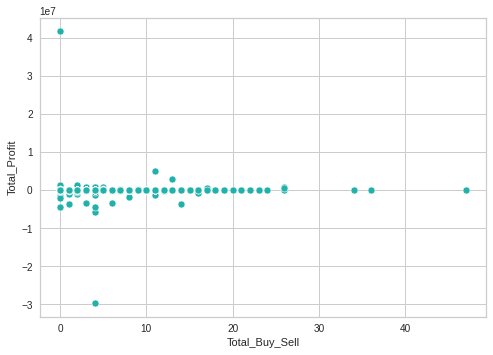

In [ ]:
# Scatter plot using Raw data before scale
ss_sns = sns.scatterplot (data = dfcluster2, x='Total_Buy_Sell', y='Total_Profit', color = 'lightseagreen')

**Standard Scaler**

Define **standard scaler** dataset

In [ ]:
#Copy the dataset
df_s_scaler = dfcluster2.copy()

#Scaling numeric value
numerical=['Total_Invested_Amount','Total_Buy_Sell', 'Total_Profit']

#Using Standard Scaler
s_scaler = StandardScaler()
df_s_scaler[numerical] = s_scaler.fit_transform(dfcluster1[numerical])
df_s_scaler

,user_age,Total_Buy_Sell,Total_Invested_Amount,Total_Profit,user_gender_Female,user_gender_Male,Age_Category,Occupation_Cat,Income_Range,Income_Source
0,28,-0.594672,-0.021351,0.002355,1,0,1,2,1,0
1,33,0.857703,-0.021351,0.002355,1,0,1,1,3,0
2,29,-0.594672,-0.021351,0.002355,0,1,1,1,0,0
3,27,-0.231578,-0.021351,0.002355,0,1,1,1,3,0
4,26,-0.594672,-0.021351,0.002355,0,1,1,0,0,6
...,...,...,...,...,...,...,...,...,...,...
8272,24,-0.594672,-0.021351,0.002355,0,1,0,5,0,1
8273,18,-0.594672,-0.021351,0.002355,0,1,0,0,0,6
8274,28,-0.594672,-0.021351,0.002355,1,0,1,1,1,-1
8275,25,-0.594672,-0.021351,0.002355,0,1,1,1,1,0


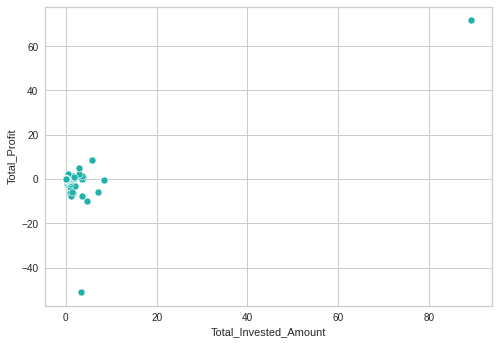

In [ ]:
# show scatter plot using standard scaler
ss_sns = sns.scatterplot (data = df_s_scaler, x='Total_Invested_Amount', y='Total_Profit', color = 'lightseagreen')

Because see significant different between dataset before scaling and after scaling, so we can use dataset after scaling to process the cluster.

####Elbow Method

1 695417.6048085052
2 278844.1412908122
3 173102.0506169871
4 132791.54427064734
5 114512.28400699387
6 101767.02584169421
7 90479.88989049336
8 81373.31582435785
9 73594.44438921707
10 67629.4499636816


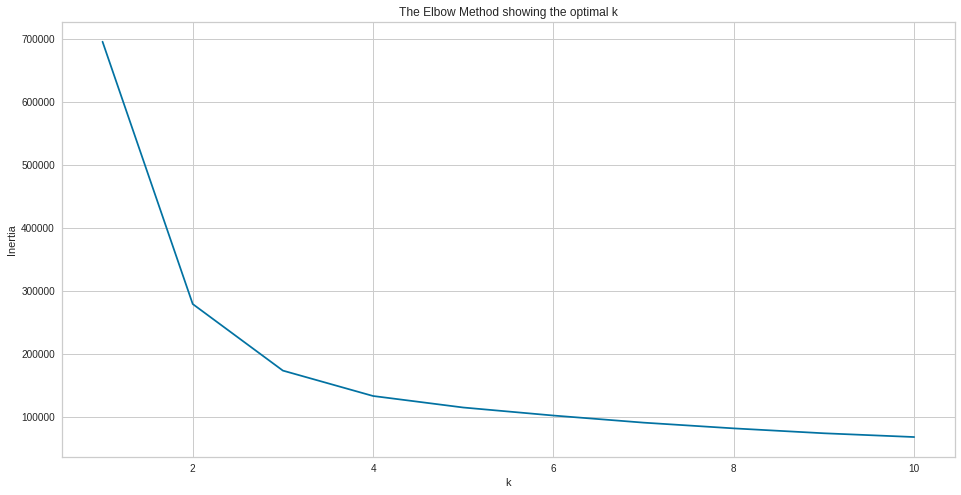

In [ ]:
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k, random_state = 7)
    kmeanModel.fit(df_s_scaler)
    distortions.append(kmeanModel.inertia_)
    print(k, kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Based on elbow method, we saw the drop value of distortion are in range **2-11** cluster. So we can use cluster range **2-11** for silhoutte analysis

####Silhoutte

In [ ]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=50, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=30, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5929212002748172
For n_clusters = 3 The average silhouette_score is : 0.46698957323140966
For n_clusters = 4 The average silhouette_score is : 0.4086770585364703
For n_clusters = 5 The average silhouette_score is : 0.3233641104218694
For n_clusters = 6 The average silhouette_score is : 0.31621150736855946
For n_clusters = 7 The average silhouette_score is : 0.30170442149613313
For n_clusters = 8 The average silhouette_score is : 0.29264383246
For n_clusters = 9 The average silhouette_score is : 0.30814305919538354
For n_clusters = 10 The average silhouette_score is : 0.3117640849364286


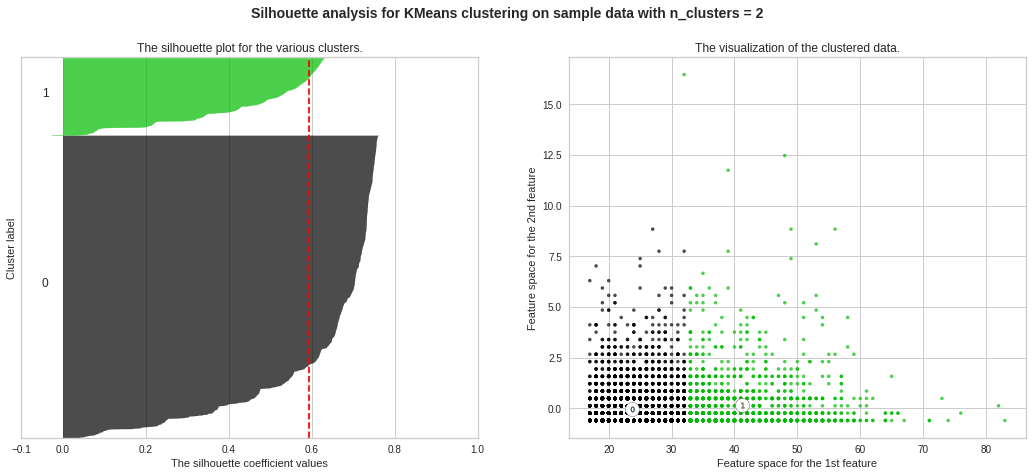

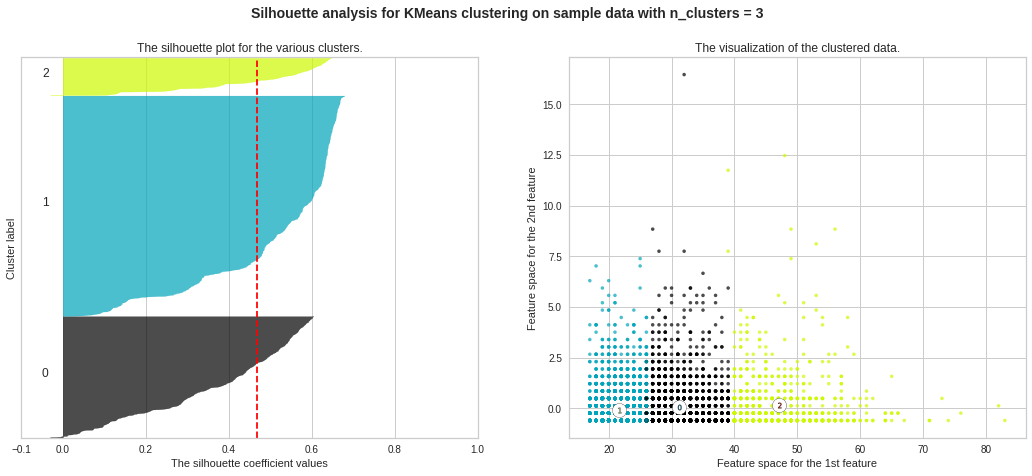

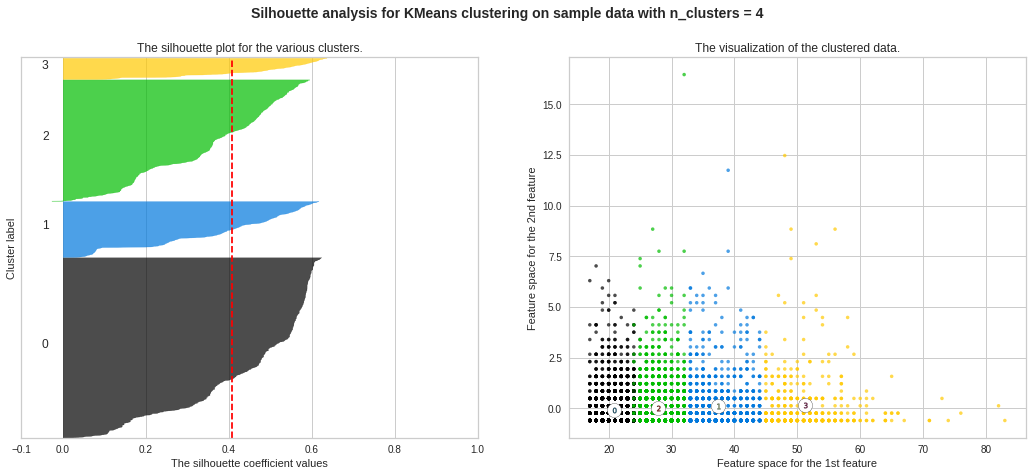

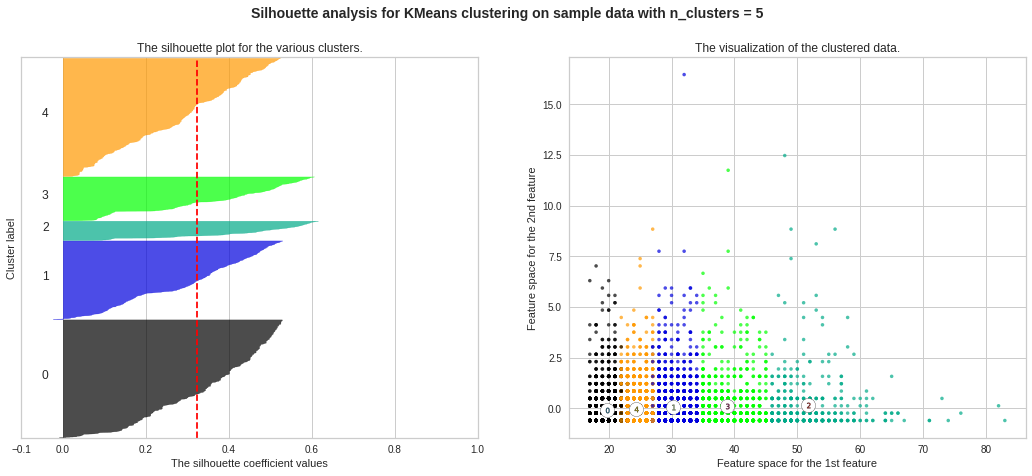

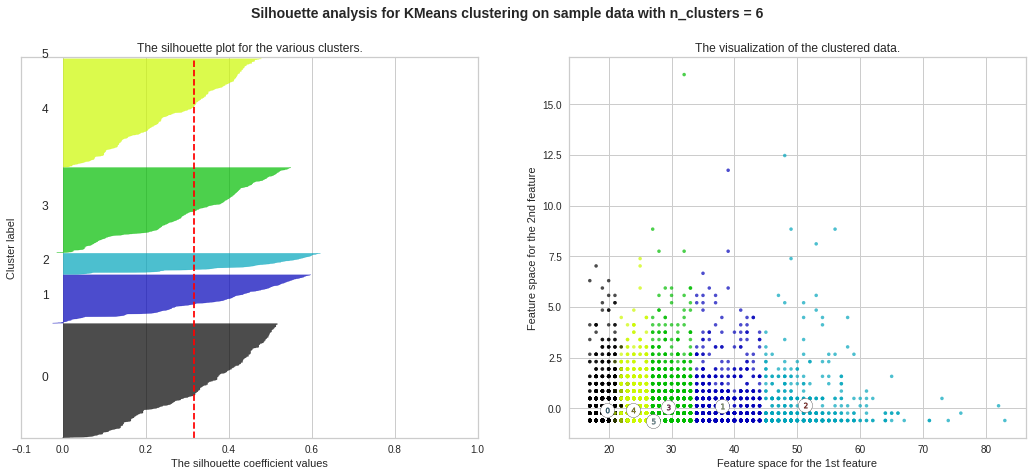

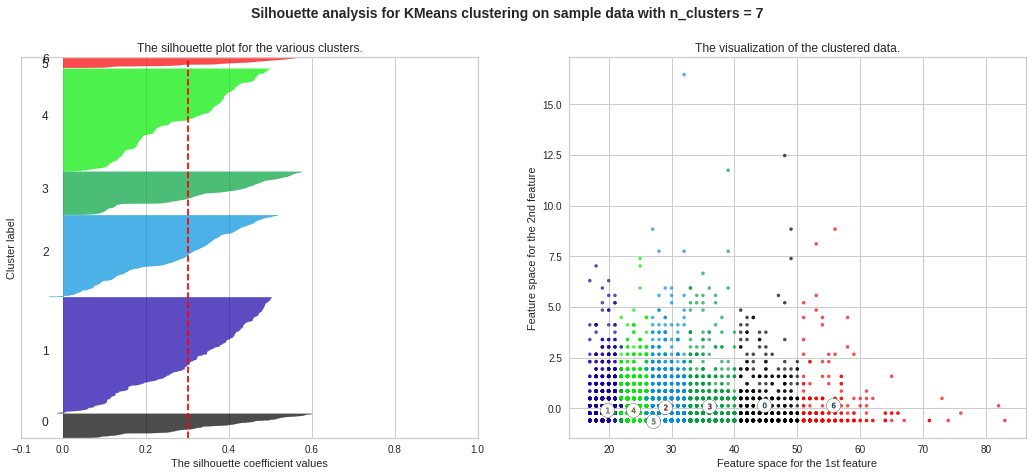

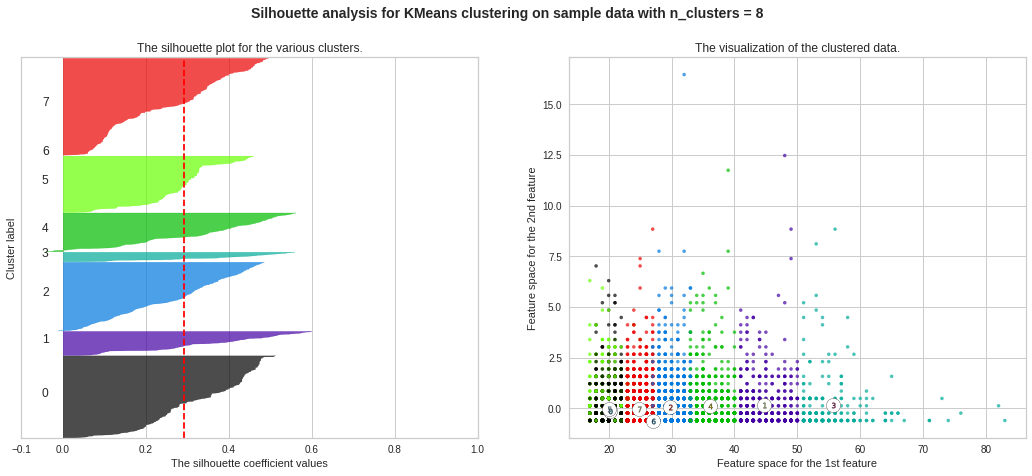

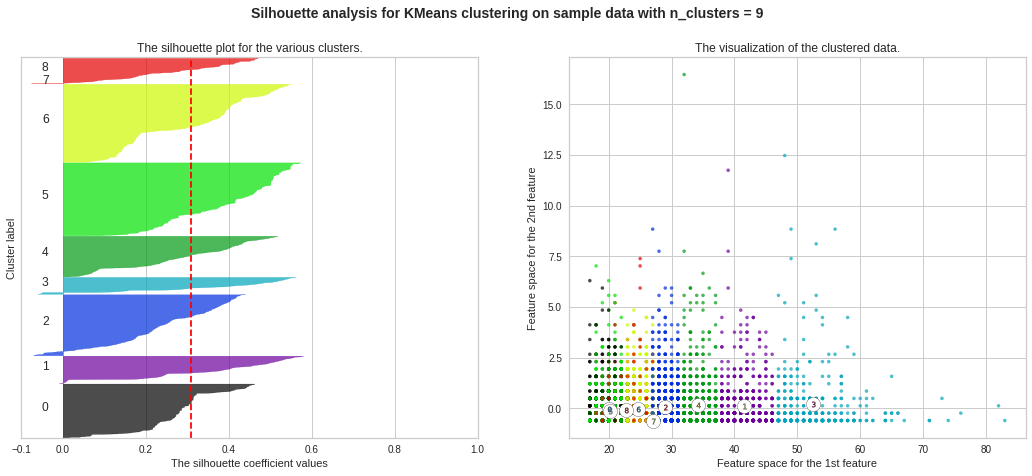

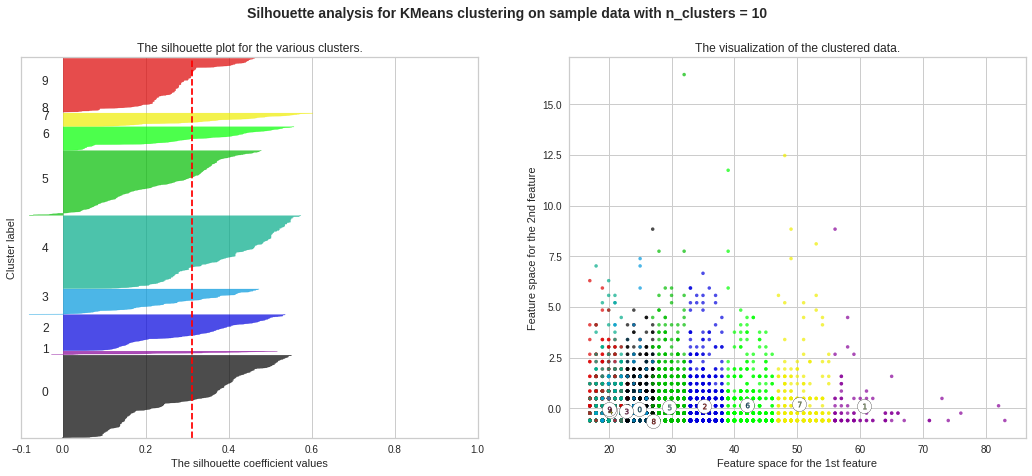

In [ ]:
# silhouette analysis range between 2-11
silhoutte_analysis(df_s_scaler,list(range(2,11)))

Based on silhouette analysis between cluster 2-11, we can define 3 cluster is recomended cluster. Because in scatter plot cluster 3 look good enough for split the cluster

####Interpreting Cluster

Assign the **numeric dataset** that has been decided as a cluster with the **categorical variables** to help us define the segmentation of this dataset.

In [ ]:
cluster_model = cluster.KMeans(n_clusters=3)
cluster_model.fit(df_s_scaler)
cluster_label = cluster_model.labels_
dfcluster1['cluster'] = cluster_label
dfcluster1

,user_id,user_age,user_gender,age_group,user_occupation,user_income_range,user_income_source,Total_Buy_Sell,Total_Invested_Amount,Total_Profit,user_gender_Female,user_gender_Male,Age_Category,Occupation_Cat,Income_Range,Income_Source,cluster
0,50701,28,Female,26-35,IRT,Rp 10 Juta - 50 Juta,Gaji,0,0.0,0.0,1,0,1,2,1,0,2
1,50961,33,Female,26-35,Swasta,> Rp 100 Juta - 500 Juta,Gaji,4,0.0,0.0,1,0,1,1,3,0,2
2,53759,29,Male,26-35,Swasta,< 10 Juta,Gaji,0,0.0,0.0,0,1,1,1,0,0,2
3,54759,27,Male,26-35,Swasta,> Rp 100 Juta - 500 Juta,Gaji,1,0.0,0.0,0,1,1,1,3,0,2
4,61414,26,Male,26-35,Pelajar,< 10 Juta,Tabungan,0,0.0,0.0,0,1,1,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,4165020,24,Male,17-25,Lainnya,< 10 Juta,Keuntungan Bisnis,0,0.0,0.0,0,1,0,5,0,1,0
8273,4165132,18,Male,17-25,Pelajar,< 10 Juta,Tabungan,0,0.0,0.0,0,1,0,0,0,6,0
8274,4165630,28,Female,26-35,Swasta,Rp 10 Juta - 50 Juta,NaN,0,0.0,0.0,1,0,1,1,1,-1,2
8275,4165704,25,Male,26-35,Swasta,Rp 10 Juta - 50 Juta,Gaji,0,0.0,0.0,0,1,1,1,1,0,0


In [ ]:
dfcluster1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   user_id                8277 non-null   int64   
 1   user_age               8277 non-null   int64   
 2   user_gender            8277 non-null   object  
 3   age_group              8277 non-null   category
 4   user_occupation        8247 non-null   category
 5   user_income_range      8277 non-null   category
 6   user_income_source     7709 non-null   category
 7   Total_Buy_Sell         8277 non-null   int64   
 8   Total_Invested_Amount  8277 non-null   float64 
 9   Total_Profit           8277 non-null   float64 
 10  user_gender_Female     8277 non-null   uint8   
 11  user_gender_Male       8277 non-null   uint8   
 12  Age_Category           8277 non-null   int8    
 13  Occupation_Cat         8277 non-null   int8    
 14  Income_Range           8277 non-null   i

In [ ]:
#Aggregate per cluster
dfcluster1.groupby(['cluster']).agg(['mean','min','max','std'])

user_id                                   user_age          \
                 mean     min      max            std       mean min max   
cluster                                                                    
0        3.639164e+06   61414  4165704  800391.240363  21.674375  17  27   
1        3.784070e+06  103108  4164476  573101.211336  46.452193  39  83   
2        3.683188e+06   50701  4165830  787562.396326  30.885240  26  38   

                  Total_Buy_Sell      ... Occupation_Cat            \
              std           mean min  ...            max       std   
cluster                               ...                            
0        2.489990       1.435000   0  ...              6  1.504481   
1        6.458131       2.119235   0  ...              6  1.497518   
2        3.333593       1.848532   0  ...              6  1.814458   

        Income_Range                   Income_Source                    
                mean min max       std          mean min max       std  
cluster                                                                 
0           0.551042   0   5  0.748896      1.081042  -1   6  1.785046  
1           1.619798   0   5  1.152500      0.502812  -1   6  1.394262  
2           1.348532   0   5  1.004748      0.223338  -1   6  0.962961  

[3 rows x 44 columns]

In [ ]:
#Total user per cluster
dfcluster1.groupby('cluster')['user_id'].agg(['count'])

,count
cluster,
0,4800
1,889
2,2588


**Insight**
- Cluster 0 = 4800
- Cluster 1 = 889
- Cluster 2 = 2588

As we can see in the table above, the **majority** of the users are in the cluster number 0

In [ ]:
#Avg age user per cluster
dfcluster1.groupby('cluster')['user_age'].agg(['mean'])

,mean
cluster,
0,21.674375
1,46.452193
2,30.885240


**Insight**
- Cluster 0 = 21.67
- Cluster 1 = 46.45
- Cluster 2 = 30.88

The highest average of user age is on users from the cluster number 1


In [ ]:
#Total Invested Amount per cluster
dfcluster1.groupby('cluster')['Total_Invested_Amount'].agg(['sum'])

,sum
cluster,
0,3.340873e+09
1,1.419261e+09
2,1.605370e+10


**Insight**
- Cluster 0 = 3.340873e+09
- Cluster 1 = 1.419261e+09
- Cluster 2 = 1.605370e+10

The highest of total invested amount is on users from the cluster number 0


In [ ]:
#Average Invested Amount per cluster
dfcluster1.groupby('cluster')['Total_Invested_Amount'].agg(['mean'])

,mean
cluster,
0,6.960152e+05
1,1.596469e+06
2,6.203131e+06


**Insight**
- Cluster 0 = 6.960152e+05
- Cluster 1 = 1.596469e+06
- Cluster 2 = 6.203131e+06

The highest average of total invested amount is on users from the cluster number 2


In [ ]:
#Total Profit per cluster
dfcluster1.groupby('cluster')['Total_Profit'].agg(['sum'])

,sum
cluster,
0,-29937405.0
1,-7538487.0
2,26117939.0


**Insight**
- Cluster 0 = -29937405.0-7538487.0
- Cluster 1 = -7538487.0
- Cluster 2 = 26117939.0

The highest of total profit is on users from the cluster number 2


In [ ]:
#Average Profit per cluster
dfcluster1.groupby('cluster')['Total_Profit'].agg(['mean'])

,mean
cluster,
0,-6236.959375
1,-8479.737908
2,10091.939335


**Insight**
- Cluster 0 = -6236.959375
- Cluster 1 = -8479.737908
- Cluster 2 = 10091.939335

The highest average of total profit is on users from the cluster number 2


In [ ]:
#Total Buy and Sell per cluster
dfcluster1.groupby('cluster')['Total_Buy_Sell'].agg(['sum'])

,sum
cluster,
0,6888
1,1884
2,4784


**Insight**
- Cluster 0 = 6888
- Cluster 1 = 1884
- Cluster 2 = 4784

The highest of total buy and sell or transaction is on users from the cluster number 1


In [ ]:
#Average Buy and Sell per cluster
dfcluster1.groupby('cluster')['Total_Buy_Sell'].agg(['mean'])

,mean
cluster,
0,1.435000
1,2.119235
2,1.848532


**Insight**
- Cluster 0 = 1.435000
- Cluster 1 = 2.119235
- Cluster 2 = 1.848532

The highest average of total buy and sell or transaction is on users from the cluster number 0


In [ ]:
cluster_group1 = dfcluster1.groupby(['cluster','age_group','user_occupation','user_income_range']).agg({'user_id':'nunique'})
cluster_group1.reset_index(level=['cluster','age_group','user_occupation','user_income_range'],inplace=True)
cluster_group1

,cluster,age_group,user_occupation,user_income_range,user_id
0,0,17-25,Pelajar,< 10 Juta,2215
1,0,17-25,Pelajar,Rp 10 Juta - 50 Juta,917
2,0,17-25,Pelajar,> Rp 50 Juta - 100 Juta,214
3,0,17-25,Pelajar,> Rp 100 Juta - 500 Juta,27
4,0,17-25,Pelajar,> Rp 500 Juta - 1 Miliar,0
...,...,...,...,...,...
625,2,>56,Guru,Rp 10 Juta - 50 Juta,0
626,2,>56,Guru,> Rp 50 Juta - 100 Juta,0
627,2,>56,Guru,> Rp 100 Juta - 500 Juta,0
628,2,>56,Guru,> Rp 500 Juta - 1 Miliar,0


In [ ]:
cluster_grup2 = dfcluster1.groupby(['cluster']).agg({'user_age' : 'mean',
                                                     'Total_Invested_Amount' : 'mean',
                                                     'Total_Buy_Sell' : 'mean',
                                                     'Total_Profit' : 'mean'})
cluster_grup2

,user_age,Total_Invested_Amount,Total_Buy_Sell,Total_Profit
cluster,,,,
0,21.674375,6.960152e+05,1.435000,-6236.959375
1,46.452193,1.596469e+06,2.119235,-8479.737908
2,30.885240,6.203131e+06,1.848532,10091.939335


**Insights**

As we can see in the data above, user with an average age of **30 years old** have the **greatest profits** while the users with an average **46 years old** have the **lowest profits**, whereas users with an average 46 years old invest their money much more than the others. 
